In [334]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df1=pd.read_csv(r'C:\Users\abhim\Downloads\data.csv')

In [8]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
print(len(df1))

5204


In [11]:
df1.head()

,Review Text,Sentiment,Fit,Fabric,Color,Style,Cost
0,This top is stunning. the colors are vivid and it is extremely cozy and soft. however it seems delicate and would need to only be worn once in a while. it is not an everyday top. the material has ...,0,NaN,-1.0,1.0,1.0,NaN
1,"Even following the care label exactly, it shrunk ~3 inches in the length and overall in the diameter. i had to return this since i am tall and it looked more like a work-inappropriate mini after t...",-1,-1.0,-1.0,NaN,NaN,NaN
2,"I was excited to receive this top. it looked great online, vibrant colors with the beautiful detail on the sleeves. when i tried it on, the fabric looked and felt cheap. it is not a flowy top. do ...",-1,NaN,-1.0,1.0,-1.0,NaN
3,Nice weight sweater that allows one to wear leggings or ultra skinny jeans without looking like i'm pregnant (not that there's anything wrong with that) very feminine and light weight enough to we...,1,NaN,1.0,NaN,1.0,NaN
4,Perfect trans top. skinnies or boyfriend and booties. love the mixed prints,1,NaN,NaN,NaN,1.0,NaN


In [12]:
df2 = df1.dropna(axis=0, subset=['Review Text'])
df2.head()
print(len(df2))

5204


In [13]:
df2['Review Text']=df2['Review Text'].str.lower()
df2.head()
    

,Review Text,Sentiment,Fit,Fabric,Color,Style,Cost
0,this top is stunning. the colors are vivid and it is extremely cozy and soft. however it seems delicate and would need to only be worn once in a while. it is not an everyday top. the material has ...,0,NaN,-1.0,1.0,1.0,NaN
1,"even following the care label exactly, it shrunk ~3 inches in the length and overall in the diameter. i had to return this since i am tall and it looked more like a work-inappropriate mini after t...",-1,-1.0,-1.0,NaN,NaN,NaN
2,"i was excited to receive this top. it looked great online, vibrant colors with the beautiful detail on the sleeves. when i tried it on, the fabric looked and felt cheap. it is not a flowy top. do ...",-1,NaN,-1.0,1.0,-1.0,NaN
3,nice weight sweater that allows one to wear leggings or ultra skinny jeans without looking like i'm pregnant (not that there's anything wrong with that) very feminine and light weight enough to we...,1,NaN,1.0,NaN,1.0,NaN
4,perfect trans top. skinnies or boyfriend and booties. love the mixed prints,1,NaN,NaN,NaN,1.0,NaN


In [14]:
firsttweet = df2.iloc[0]['Review Text'] # select the first row, column text, python indexing starts with 0 not 1
firsttweet


'this top is stunning. the colors are vivid and it is extremely cozy and soft. however it seems delicate and would need to only be worn once in a while. it is not an everyday top. the material has a cotton candy like appearance. it really is unique and one of a kind.'

In [15]:
import nltk
words = nltk.tokenize.word_tokenize(firsttweet) # divide up tweet into words
fdist = nltk.probability.FreqDist(words) # calculate frequency dictionary
fdist

FreqDist({'.': 6, 'is': 4, 'and': 4, 'it': 4, 'a': 3, 'top': 2, 'the': 2, 'this': 1, 'stunning': 1, 'colors': 1, ...})

In [16]:
punctuations = ['``',"amp","...", '#', '$', '%', '&', '(', ')', '*', '+', '-', '/', ':', '<', '=', '>', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [17]:
import string
reviewwords = []
data = []
data1 = []
for review in df2['Review Text']: # loop over tweets
    reviewwords = nltk.tokenize.word_tokenize(review) # break into words
    data = [word for word in reviewwords if word not in punctuations]
    data1.append("".join([" "+i if not i.startswith("'") else i for i in data]).strip())
    
    
#fdist = nltk.probability.FreqDist(words) # calculate frequency distribution
#fdist.most_common(50)

In [18]:
df2['Review Text'] = data1
df2.head()

,Review Text,Sentiment,Fit,Fabric,Color,Style,Cost
0,this top is stunning . the colors are vivid and it is extremely cozy and soft . however it seems delicate and would need to only be worn once in a while . it is not an everyday top . the material ...,0,NaN,-1.0,1.0,1.0,NaN
1,"even following the care label exactly , it shrunk ~3 inches in the length and overall in the diameter . i had to return this since i am tall and it looked more like a work-inappropriate mini after...",-1,-1.0,-1.0,NaN,NaN,NaN
2,"i was excited to receive this top . it looked great online , vibrant colors with the beautiful detail on the sleeves . when i tried it on , the fabric looked and felt cheap . it is not a flowy top...",-1,NaN,-1.0,1.0,-1.0,NaN
3,nice weight sweater that allows one to wear leggings or ultra skinny jeans without looking like i'm pregnant not that there's anything wrong with that very feminine and light weight enough to wear...,1,NaN,1.0,NaN,1.0,NaN
4,perfect trans top . skinnies or boyfriend and booties . love the mixed prints,1,NaN,NaN,NaN,1.0,NaN


In [19]:
analyzer = SentimentIntensityAnalyzer()
positivesg = []
negativesg = []
for l in df2['Review Text']:
    vs = analyzer.polarity_scores(l)
    print("{:-<65} {}".format(l, str(vs)))
    positivesg.append(vs['pos'])
    negativesg.append(vs['neg'])

this top is stunning . the colors are vivid and it is extremely cozy and soft . however it seems delicate and would need to only be worn once in a while . it is not an everyday top . the material has a cotton candy like appearance . it really is unique and one of a kind . {'neg': 0.038, 'neu': 0.735, 'pos': 0.227, 'compound': 0.8442}
even following the care label exactly , it shrunk ~3 inches in the length and overall in the diameter . i had to return this since i am tall and it looked more like a work-inappropriate mini after the first wash . {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.7178}
i was excited to receive this top . it looked great online , vibrant colors with the beautiful detail on the sleeves . when i tried it on , the fabric looked and felt cheap . it is not a flowy top . do not recommend it . {'neg': 0.041, 'neu': 0.609, 'pos': 0.35, 'compound': 0.9402}
nice weight sweater that allows one to wear leggings or ultra skinny jeans without looking like i'm pregnant

this is my new favorite top ! looks and fits as described .------ {'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.6239}
another great dress by retailer . i've worn it with tall boots with heels , riding boots and booties all look really good . i've also added a cream/beige cardigan and even a fuzzy/furry vest . very versatile . the only few things that i would have liked even more is that design of the dress be actual stitching and not just a flat print and also the material does shrink a tat when you wash it . it's a staple and keeper . {'neg': 0.028, 'neu': 0.845, 'pos': 0.127, 'compound': 0.8357}
i've purchased pilcro jeans in the past and they've held up great . unfortunately , the material used for this particular jean is a far , far cry from what it used to be . the thighs of these jeans start pilling yes pilling ! after just a few wears . i've never had jeans do this -- whatever denim blend they are using is a complete disaster . do n't buy these -- you will be very disap

the fabric is so beautiful that i am tempted to buy in a large size and have re-made . the waist is tiny . the hips are wide . when it goes to half price , i may be tempted to take it to my favorite alterations lady . the fabric is that exceptionally beautiful . {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.9323}
this blouse is so beautiful the collar , sleeves , material everything except the cut ! it was like a tent . it needed to be more tapered , which would be easy to do while still maintaining the beautiful breezy flow , and be about two inches longer . i had been drooling over this top for awhile and was so disappointed ! please fix it and then i will buy again . i am 5' 4'' , 140lbs and busty a small was perfect , with the exception of the massive amount of material . {'neg': 0.06, 'neu': 0.701, 'pos': 0.239, 'compound': 0.9593}
cute little dress fits true to size . it is a little high waisted . good length for my 5' 9 height . i like the dress , i'm just not in love w

really cute and very comfortable . material is thin and sheer . i wear tanks under things anyway , but especially in pink , you would need to . but love the style . {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.8818}
nice fit and flare style , not clingy at all . i got the grey color , petite large , fits perfect . will wear with tights/boots or booties . lots of color options to accessorize with . {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.8481}
i read all the reviews and was hoping that this top would work for me , but it did not . i ordered a size smaller than usual and it was still way too big . it was not flattering at all on my curvy frame . overall , it looked more like a maternity top on me then anything else ! if you're tall and slender , i think this top would work ! {'neg': 0.035, 'neu': 0.795, 'pos': 0.17, 'compound': 0.8191}
unlike the other reviewers , i did not have any problem with the sizing , fit or length of this skirt . it is a midi skirt so i t

like another reviewer mentioned , this shirt is way too short . i'm only 5' 2'' xs and there is no way this top would tuck in like on the model . also , the quality is n't great as it's very thin and there are strings hanging from some of the seams in the front . it's a shame because the print is really pretty and there is this cute little bicycle charm on the tag which makes it feel more unique . sadly , it's going back ! {'neg': 0.118, 'neu': 0.716, 'pos': 0.166, 'compound': 0.5906}
this dress seems quite high quality and is wonderfully designed , except in the chest . the wrap style hugs in all the right places but the chest . i'm slightly large chested 34c/d but can usually wear a size small or size 4 in dresses and tops 5' 5'' , 122 lbs . the small in this dress was great everywhere else , but i could n't breathe and it totally flattened out my chest . also , it is quite low cut , so another mark against it for anyone with a semi-large bust . could n't wear it to work that reason 

like others reviewers mentioned on here , this dress is extremely well made . but there were too many cons for me , as well . this would most certainly work on a petite/shorter frame , but for tall , busty , and curvier girls , it just sits wrong on all places unfortunately . the color is lovely along with the nice collar that ties in the back really made this dress stand out . however , i'm a 36c and found that the arm/shoulder part so large and bulky that is made me look bigger on top . there was entirel {'neg': 0.067, 'neu': 0.738, 'pos': 0.195, 'compound': 0.9174}
i ordered online . i sized up one size . it fit perfect . so flattering and so pretty . then i tried to take it off and the zipper stuck badly . 30 minutes later i was sadly packing it up to ship back . the zipper is that awful . {'neg': 0.194, 'neu': 0.587, 'pos': 0.219, 'compound': 0.3369}
i love the color of this skirt , and the fabric is wonderful . it was a bit longer than anticipated , but fit well . {'neg': 0.0, 'n

wanted to love this dress pretty fabric and colors . i think it would be more flattering on a taller woman i'm 5' 3'' , ordered a s , this just looked like a nightgown on me . sorry to say it's going back . {'neg': 0.03, 'neu': 0.685, 'pos': 0.285, 'compound': 0.9041}
i had been eyeing these for a while , but as they did n't seem very popular , i figured i'd wait for a sale . i finally bought them at the 40 off of sale price yay ! and i love them . they're extremely comfortable , and very flattering . i'd say they run true to size , but maybe on the smaller end of the size for the waist . the blue pants are more greenish in color than the picture shows , but still beautiful . i'm looking forward to wearing these now and into the spring . {'neg': 0.031, 'neu': 0.711, 'pos': 0.259, 'compound': 0.9812}
some reviewers found this skirt to be on the smaller side , but for me , it was big , , , too bad the smaller size is sold out well , all peittes are sold out . the length is also pretty lo

i ordered the blue in size 16. it ran at least two , if not three , sizes too small compared to my other retailer 14 16 blouses . it was too small through the body , other than the peplum . the arms were tight too . the waistline and length matched the online photos . it's widening . the material they chose was also scratchy and rough , especially around the neckline . i returned mine after trying it on and seeing there was no way to make this work . the blue color was gorgeous though . the patterned lace w {'neg': 0.024, 'neu': 0.933, 'pos': 0.043, 'compound': 0.4215}
such a cute skirt- but impossible to get on . ordered in an xs i have a 25/26 waist but could barely get it past my knees to step into . if you have any hips at all , unfortunately this skirt wo n't work . i was tempted to size up but once i got it on it fit great in the waist and already had too much material to size up to a small . {'neg': 0.041, 'neu': 0.816, 'pos': 0.143, 'compound': 0.8316}
beautiful fabric with sof

i love the fit of these pants -- they're the perfect slim black pants . however , i wore these pants exactly three times before the seams split the middle of the pant in not just one , but multiple places . disappointed by the workmanship/quality of the product , especially since the pants fit amazingly and do n't sag like other slim fitting black pants tend to do . i hope retailer will take this into consideration and improve the quality of future iterations of this product . {'neg': 0.071, 'neu': 0.744, 'pos': 0.185, 'compound': 0.87}
the dress is too loose and runs too big-------------------------- {'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'compound': -0.3182}
i am on the fence about this dress , as you'll see the reasons below , but it is really breathable fabric and extremely comfortable ! _________ pros tons of stretch to the top part . i'm a 36c , so a lot of retailer tops are too snug for women with some bust . however , i fit into a medium here without it being too snug . you c

i love this tee but there is a lot of swing/ fabric so it can tend to make you look wide . also , i have a short torso to begin with but this tee is on the short side . i'm still undecided on whether i'm going to keep it because it's rayon/ poly and it's hand wash only . and i'm worried that one wash will make it shrink in length and it's already short . rayon knits have a tendency to shrink in length when washed so beware ! {'neg': 0.058, 'neu': 0.862, 'pos': 0.08, 'compound': 0.4664}
i wanted this tank to work so badly ! it was a great deal and so beautiful . unfortunately the top fitted portion ends right below my chest then the shirt flares out so i looked like a cupcake . my belly also showed slightly because the shirt is short . if you have a short torso , this would work great . if not , unfortunately , its not great tear {'neg': 0.115, 'neu': 0.613, 'pos': 0.272, 'compound': 0.9302}
i got the blue . it is very short . one side of the shirt i received was shorter that the other 

i ordered this top in size xl . there is a lot of excess material below the empire waist so it flows out too much . this accentuated my pear-shape and was unflattering . the sizing on the top portion sleeves was true-to-size . the material is so rough , scratchy uncomfortable . they should have used a softer fabric . the pattern alignment is terrible on the one i received . at 100 , i hoped the plaid would have flowed in a continuous , matching line . i did n't notice the mismatched sleeves of the {'neg': 0.068, 'neu': 0.86, 'pos': 0.071, 'compound': -0.1935}
ladies this top shrinks ! ! ! i am very disappointed , i was in love with this top and the first time i washed it it shrunk a significant amount . i did not use a dryer , i laid this piece out to dry as i do with the majority of my knit tops and it shrunk . it is a lot shorter and much tighter , especially in my arms . if you love this top i might suggest buying a size up and washing it to fit . {'neg': 0.039, 'neu': 0.707, 'pos':

i purchased this skirt at retailer store in texas . i fell in love since i saw it . the fabric is nice and the colors are pretty and cheerful for this spring/summer ! ! and it has pockets on the sides ! do n't we love pockets ? very practical and lightweight {'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.9627}
the print is very pretty but the fabric is stiff and it runs way too big . looks great on the model but awful on me . {'neg': 0.118, 'neu': 0.649, 'pos': 0.233, 'compound': 0.5989}
the design/shape of the dress are quite flattering , flirty and feminine . but . there is no way that the dress i received is new . the color is a faded washed out red and there are black stains all over the belt area . there is no tag the fabric looks droopy and laundered and is not crisp , stiff or new . i am very disappointed by the quality of the item that i received . undoubtedly this one is going back . dear retailer please make sure that you do not send pre-owend clothing articles to {'n

i bought this in the white , size m 140lbs. , 5' 8'' , 34b because i wanted a baggy fit , which i got , so this is true to size . the white is more of an off-white rather than a bright white , which i like because i happen to be looking for an off-white tee . and the shape is good -- even in a larger size , this tee nips in at the waist.however , the quality of this tee is lacking , as it is the typical , cheap , marled , slightly see-through material that seems to be everywhere these days and the band on the back of th {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.9163}
these pants are fun ! i use them as sleep pants . i had to size up because the waist band was a little tight for comfort . {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.703}
the colors are vivid and perfectly autumnal but the fit is a mess . it was overall too large , the waistline curves up in the front and then falls into small pleats which was maternityish , the waistband was thicker than the dress

this top is so much better in person . i do not agree with some of the other reviews about the fabric being scratchy . it is not and i have sensitive skin . i love this top and have got lots of compliments . {'neg': 0.044, 'neu': 0.67, 'pos': 0.286, 'compound': 0.8902}
the zipper broke on this piece the first time i wore it . very disappointing since i love the design . i'm actually going to try to replace the zipper myself with something stronger , but annoying that it's come to that . {'neg': 0.174, 'neu': 0.724, 'pos': 0.102, 'compound': -0.4879}
the cut of this shirt is lovely and well thought out , the opening for the arm are not too big like some other shirts . i liked the material and the melon/ salmon color which i ordered was more vibrant in person . this does run large so i wished i had ordered one size down . {'neg': 0.069, 'neu': 0.726, 'pos': 0.204, 'compound': 0.8475}
i bought this shirt in a l , since i did n't want it to be too fitted and was concerned a m would be . it

cute and pretty , runs a little wide and short , just slightly . i feel like i have that issue with all retailer clothes though . love the back . {'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.9122}
i'm keeping this top because it was on sale but it does look a little maternity ! i wore with super skinny white jeans and 3'' casual heel . i'm short so i needed a little more height to slim me but if your tall and and slender this might work better for you ? {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9215}
i ordered the sweater in a medium but it was too large so reordered it in the small and it fits perfectly . love the length- it hits mid hip . it is more of an a-line than straight as show in the picture . the detail is fun and the sweater is well made . highly recommend it- i have received lots of compliments on this sweater . {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.9839}
i got this in the petite length , size o , and it fit just right . i like that i

i love the look and feel of this tulle dress . i was looking for something different , but not over the top for new year's eve . i'm small chested and the top of this dress is form fitting for a flattering look . once i steamed the tulle , it was perfect ! i ordered an xsp . length was perfect too . {'neg': 0.057, 'neu': 0.7, 'pos': 0.243, 'compound': 0.9345}
really nice , substantial , fully lined sweater coat . i love the structured look and the faux-leather piping around the zipper and the pockets . quality seems to be very good . it runs true to size , maybe slightly on the small side especially for larger hips/busts so if you are in between sizes , go up . i chose small and it's just right ; i would n't be able to zip around my hips with xs . besides the price , which is why i dropped one star , i can not really find any fault in this sweater coat . {'neg': 0.03, 'neu': 0.815, 'pos': 0.155, 'compound': 0.9081}
this vest is very warm and soft . it is actually a fleece that almost a

i wish that it had fit me better as the feel of the fabric and the color were great ! regrettably , i am sending it back as the v opening is too low for my tastes and the fabric on the left of the first layer drapes weird on me . i am usually a s or m and in this top the s was plenty of length and room , would be swimming in a m. the fabric was soft and felt great against your skin and not thin as some fabrics can be . the color was just as shown and beautiful . hope it works for some of you out there {'neg': 0.056, 'neu': 0.734, 'pos': 0.21, 'compound': 0.9617}
i've been looking for bralettes that provide some support but not binding/tight for night time and casual wear . this is a light weight bra , could be a little more supportive . pretty color , with nice lines . only downside is the retailer tag on the back itchy i need to remove it . {'neg': 0.086, 'neu': 0.666, 'pos': 0.248, 'compound': 0.8672}
very disappointed in this top . i have a short waist , and it was still too short f

i splurged on this pajama set for myself and now regret it . even though the design is adorable , the fabric contains acrylic and the knitted fairisle part started pilling within the first week of wear . after a month and a couple washes , it looks horrible , and the fleece part is looking a little grungy as well . so so disappointed . the top is intentionally oversized and comes down to my crotch , i could have easily sized down . {'neg': 0.119, 'neu': 0.767, 'pos': 0.114, 'compound': -0.3551}
i was excited to get this shirt in the mail , i liked the pattern a lot , but was so disappointed when i tried it on . i am 5' 4'' , 130 lbs . and wear a c cup so i tried ordering a small as a starting point . there was enough fabric on the sides to make another shirt ! despite the excess fabric , the shirt pulled open in the chest area , making it a complete fail . i'm sure the model in the photo must have the shirt clipped in the back to pull in the excess fabric , especially since she's small

i love the flower patterns . they add feminine touch . this legging is well made with good quality spandex . the only cons is the color is not as deep as the picture . when you wearing it and the fabric stretched , the color looks much lighter . other than that , it's a good buy ! {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.908}
very cute flowy fit . i am generally a size small , 32-d chest . because the material has no give it fits perfectly just barely if it was any smaller or i was any larger it would be too small . very cute design . {'neg': 0.045, 'neu': 0.677, 'pos': 0.278, 'compound': 0.9072}
i so wanted to love this dress ! the fabric is gorgeous the styling beautiful and the construction is great however , the armholes are cut too generously . i am 5' 4'' , 138 pounds and 36d . i ordered the black in a size 10. it fit me perfectly everywhere but the armholes . even with an undergarment , too much is exposed . i am sadly returning this . {'neg': 0.094, 'neu': 0.672, 

beautiful color , , great quality , and great fit if you size up ! i learned my lesson with previous purchases and sized up when i read it runs small . i usually wear a 0/2 and i took a risk and went for the 4. it fits perfectly . i have a 25 in waist . {'neg': 0.036, 'neu': 0.636, 'pos': 0.328, 'compound': 0.9583}
i was worried about this item when i ordered it because of how it looks in the picture , but i had wishful thinking . i should have gone with my gut ! this shirt does not have the same quality as all my other retailer purchases . it is see-through and flimsy . the bottom is just like the picture , it hangs in an odd rumpled way . the top is very flattering though , so it's a shame ! if the bottom fit nicer like their other products i could have gotten away with wearing a cami under it to make up for the {'neg': 0.082, 'neu': 0.739, 'pos': 0.178, 'compound': 0.8923}
this is the most flattering shirt -- love the fit and color !---- {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'com

i had tried this on in the beige loved it but could not find it in my size so i got it in the pink . did not look at good as the beige . {'neg': 0.09, 'neu': 0.839, 'pos': 0.071, 'compound': -0.1677}
i loved this dress the minute i tried it on and am actually really sad that i had to return it . however , the embroidery was unraveling in several places before i'd even worn it , so i thought it would probably only get worse . too bad because it's gorgeous and flattering ! {'neg': 0.202, 'neu': 0.632, 'pos': 0.165, 'compound': -0.3149}
what a let down . the sweater i received in no way resembles the product pictured . based on the original price point , i envisioned a beautiful hand-knitted sweater made of high grade yarn/ wool that i could use for travel . instead , i received something that is grossly oversized for xs/s , made out of weird crafting yarn and looks like an ugly holiday sweater . my kids could make something better than this on their toy loom . not the quality i expected 

this top was quite voluminous when i purchased it and i sized down to an xs , however after hand washing it once in cold water it has shrunk significantly . it still fits , but something to be aware of . {'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'compound': 0.3612}
this is a beautiful fabric and the skirt is so nice . what is wrong is the cut of the skirt . one side bells out more than the other , giving it an off center look from the front . my legs were not centered . {'neg': 0.102, 'neu': 0.704, 'pos': 0.194, 'compound': 0.6924}
this is a great pant to wear to business and when you just need something more than a jean . not so skinny a 50+ woman can wear comfortably.. {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.6249}
tried this lovely with high waste , wide leg , black flowy pants . everything i could hope for and more , but not quite ! size blindly ordered size 6. i'm usually a small , occasionally xs in retailer brands like floreat and akemi+kin . i'm 5' 5'' tall , 130 l

i loved this top in the blue and wanted so badly for it to fit however it was very unflattering on my 5' 7'' frame . the bottom hemline is straight across all around whereas i thought it was longer in the back . i could see this looking great on a really petite frame . runs large , xs fit however was n't flattering {'neg': 0.083, 'neu': 0.684, 'pos': 0.233, 'compound': 0.8673}
beautifully made pants and on trend with the flared crop . so much cuter in person . love these ! {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.9148}
these cropped pants are very light weight and super cute . they seem to run just a bit small i sized up one size from my usual and do n't seem to stretch so a size larger than you generally take may be necessary . the thin pin stripe design is very light in color so they are quite versatile . {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.7845}
my perspective is as a sewer so i'm more picky perhaps . this top is poorly made . the fabric pattern is c

this was going to be my go to top . i loved the look of the billowy shirt , especially in light blue . when it arrived , i knew it would n't work for my body . i'm athletic build with muscular upper arms and a d cup . i tried it on anyway . i really wish it fit . it was snug in the upper arms and pulled a bit in the front . i knew if i ordered a size up the arms would still be tight . it's just the cut of the shirt . this top is best for someone that is n't busty and has slender upper arms . {'neg': 0.02, 'neu': 0.816, 'pos': 0.164, 'compound': 0.9366}
the wide leg was fun , not too wide , but the long pocket seem to shorten leg so i returned . great for a taller person . bottom trim cute {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.9219}
this has great drape , length , the pattern is super versatile with solids or prints . i am finding the wool to be itchy around the neck , so not sure if i will keep , though i do n't seem to want to take it off ! has a lightweight , boiled 

this dress runs very large . i am 5' 4 and 120 lbs , hourglass , curvy build . i ordered a size small and its enormous on me . the description says fitted but it is not fitted at all . it's like a big wool sack . i'd have to gain 30 lbs for this dress to come close to fitting . i'm very sad that the fit is so far off and the dress is now all sold out in all smaller sizes , including petite . i never normally buy petite clothes but i think i would have to get a petite xs if it were available . the dress {'neg': 0.043, 'neu': 0.852, 'pos': 0.105, 'compound': 0.7587}
i bought this jacket based on how it looked on the model , and from the reviews . i found it to be super big , and unflattering to say the least . i'm 5'' 10 , 155lbs . i sent it back . {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.5994}
these pants are even better in person . the only downside is that they need to be dry cleaned . {'neg': 0.096, 'neu': 0.766, 'pos': 0.139, 'compound': 0.2263}
i wish i had read all t

note to photographers please do n't cinch the wait of a blouse to make something look tailored when it is n't . this could have been a real win if it had been more simply executed . i'm petite , way too much fabric . returned . {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.7269}
this runs sooo big ! i normally wear a large 145lb , 5'-4'' , 36dd but due to the limited sizing small or medium i chose small because it looked big on the model and this style of dress seem to run large . the size small that i ordered could have fit two people easily together ! i loved the pattern , color and the slip underneath actually fit well but i dont want to look like im wearing a tent , lol . also , the back is slightly longer than the front , something i couldnt see from the pictures online . {'neg': 0.035, 'neu': 0.728, 'pos': 0.238, 'compound': 0.9734}
the print on these leggings is so cool but they are completely see-through . i mean seriously , seriously see-through . {'neg': 0.234, 'neu'

i tried these on on a whim because i liked the shirt that they were displayed with in the store and was surprised how much i liked them ! they are a great lighter weight alternative to the pilcro hyphen chino . great for hot days of summer . the subtle vertical stripes go with everything and help elongate the leg . overall a really flattering cut . the waist is not too low and does not create muffin top . {'neg': 0.067, 'neu': 0.668, 'pos': 0.266, 'compound': 0.9539}
this would be great on someone with a slim build . it's very true to size , it hits above the hips and runs pretty straight through the body for a boxy look . i loved the color and pointelle detail but on my thicker build it just sort of hung in a too-casual way . note that it is the kind of cotton that is likely to stretch with wear and spring back with cleaning . {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.8223}
this shirt is not near as nice as it may look the fabric is just ok it runs large i ordered a xs an

i'm 5' 4'' 125 lbs ordered small . fits perfect . super soft denim . love the color love the worn in feel {'neg': 0.066, 'neu': 0.452, 'pos': 0.482, 'compound': 0.9413}
i love the style of this top , and the longer length would be great with leggings and fitted shorts . it's somewhat fitted on the top yet it's a-line shape gives a full swing at the bottom . the ruffled v-neckline is pretty , and i like the longer length of the short sleeves . but with all these attributes , unfortunately they cut the armholes really big , so when you put your arms forward , the sleeves pull against your arms . i was trying to decide if i should keep it anyway , but for 98 dollars i {'neg': 0.06, 'neu': 0.815, 'pos': 0.125, 'compound': 0.5023}
another shirt i really wanted to love . i adore green but so few tops are made in this color . please make more ! ! however , this shirt did n't work for me . i think it's a matter of where your curves live . the shirt was true to size , but my boobs meant i was s

first of all , this is not pullover styling . there is a side zipper . i would n't have purchased it if i knew there was a side zipper because i have a large bust and side zippers are next to impossible for me . second of all , the tulle feels and looks cheap and the slip has an awkward tight shape underneath . not at all what is looks like or is described as . sadly will be returning , but i'm sure i will find something to exchange it for ! {'neg': 0.038, 'neu': 0.902, 'pos': 0.06, 'compound': 0.4199}
i ordered the white solid the white with blue stripes versions in size xl . both fit me true to size . the fit matches the model's photos . i got these on sale and they're worth that price . they're great basics to have . the white/blue striped one is my favorite . it such a pretty combo . i love the unique neckline too . fun details for a basic tee . {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.9801}
fits well through the shoulders and arms , but there is zero waist , and it j

this coat is a perfect fall to winter transition coat . it is surprisingly warm in 50 degree weather , so i'm sure it will be warm enough in 30-40 degree weather with some added layers . the only thing to note is that it is unlined and the material is soft so it may be prone to pilling . can be worn casually , to work , and dressed up . {'neg': 0.03, 'neu': 0.779, 'pos': 0.191, 'compound': 0.8683}
beautiful jacket and i got lots of compliments . true to size . it's not thick but it's very warm . {'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.7899}
great shirt to wear with white pants and wedges . i'm a teacher and this is perfect for warmer months for school or for casual evening out . it runs big but falls in such a way that it does n't make the wearer look big ; it falls elegantly and in a flattering way . great , versatile shirt . {'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.9604}
i like the lace-up trend , but most designs are too revealing . this shirt is super s

this is not worth 128 . it looks cute on but .there is no support in the bust area . just a slight tuck in the fabric -it also is very flowy which is great and it is comfortable but for the price and the thinness and lack of meatiness to the fabric itself i can not recommend and will be returning . i'll look for something else . i have n't bought from retailer in a dogs age and i hope the quality has n't slipped i will look for another option . {'neg': 0.094, 'neu': 0.717, 'pos': 0.189, 'compound': 0.9145}
looks much nicer in the photo . i expected a much higher quality fabric . this fabric truly felt cheap . i expected a nicer dress for the price . the fit was unflattering on me . sent it back {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.8807}
this is a beautiful sweater with deep rich colors . i purchased the blue motif . the problem is that the model s are small busted , which allows the side panels and front panel to lay nicely and swing in a flattering manner . i am 5' 6

this jumpsuit is so cute and it looked amazing on . i had to return it because of the poor design . it was extremely hard to put on and take off ! there are so many buttons to do and undo which are not as easy as snaps ! the fabric buttons definitely make a great look to the jumpsuit but there should be a zipper on the side for easy access , or use snaps instead of the loops for the fabric buttons . what a shame of a lovely and classy design on a good quality material , but not worth it if it's difficu {'neg': 0.121, 'neu': 0.689, 'pos': 0.191, 'compound': 0.8849}
great fabric but unfortunately it did not look good on me . maybe on a tall person , i'm only 5' 4'' . really wanted to like this {'neg': 0.192, 'neu': 0.617, 'pos': 0.191, 'compound': -0.0035}
this is a perfect jacket over any shirt , tee , or dress . jacket is well made and goes with anything ! {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.7263}
i really want to love this shirt , but the small is just way too big o

not for the long waisted . i immediately ordered this top when i saw it online . the embroidery is beautiful although it will require extra care . the soft lavender color was a breathe of fresh air . however , i felt like i was wearing a maternity top as it hung oddly on my slim , 5' 9'' frame . i am long waisted so perhaps petites will find this top works for them . i agree with the other reviewer that indicated the arm openings are a bit large and deep . sadly , this one went back . {'neg': 0.029, 'neu': 0.759, 'pos': 0.212, 'compound': 0.9393}
this blouse does have a flowy , boxy shape to it but the details make up for that . when i wear it tucked into a skirt it looks wonderfully flattering . i tried on an xs and considered looking for a xxs but i feel that size would probably end up being too short instead of more fitted . {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.8519}
i desperately wanted this to work it's a beautiful color and overall quality it is just so short an

i love floreat and was excited to find this top on sale . i received multiple compliments the first day i wore it . it is true that it might be better with a bit less fabric but it was n't a deal breaker for me . the flowy shape it ideal for summer . {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.9201}
pretty color , great details , awesome stitching.. aaaaannnnnnd it actually not only goes out a line but ballooned out above the hem and then came back in just too much fabric down below . nice at neck , arms and chest but disastrous anywhere below that . {'neg': 0.1, 'neu': 0.695, 'pos': 0.205, 'compound': 0.5499}
i love this tank to wear alone because it is soft and more lovely than a basic plain tank . it is especially great to layer with a sweater/ cardigan . the colors are always fabulous and the design is wonderfully feminine . i own several and love them all . it's a great value especially on sale . i normally wear a size 6 and the small fits perfectly . {'neg': 0.024, 'ne

i love this dress and would have bought it on the spot without hesitation if i just had an event to wear it to ! i am plus sized 18 pants , 16 dress , 5' 7'' , 36-38 ddd and i never size down but i was able to with this dress because it is so flowy . the dress hit just below my knee and the only fit difference i saw when i tried on the petite is that it was slightly shorter still no thigh showing . this would be flattering on absolutely anyone ! if you are worried about bulges this dress will give y {'neg': 0.05, 'neu': 0.846, 'pos': 0.104, 'compound': 0.6795}
this skirt is beautiful , i even have the perfect shirt to wear with it , sadly , though , i have to decide between too many nice things what to do ! i tried on the 0 , and it fits me perfectly . above the knee , waist just right 26.5 in . colors are fun and great for fall , but could also summer-ize the skirt.fabric is thick , however , and well-made . i highly recommend , but leave a 0 for me ! {'neg': 0.046, 'neu': 0.723, 'pos

this top is adorable , i finally broke down and bought it , so happy i did fits good , not too long sits at hip were it should very flattering i went with the reviews and sized up , i am a petite sx normally in retailer , but went with what the reviews said and got a reg small glad i did ! it is a bit snug not tight in the chest , but has stretch to it , i am 5' 1 108 33d if you are bigger in the chest i would recommend a medium , i got the purple motif print no see thru issues , the material is a comfortab {'neg': 0.044, 'neu': 0.79, 'pos': 0.166, 'compound': 0.8992}
the top is adorable , but probably better to wait for a sale as the full price is a little high for a simple top like this . i got the print one and it's very true to size . {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.9427}
i love the fit of the peplum top . it's flattering without being too full on the bottom . the print is lovely and great for summer and spring ! {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp

i really loved this vest online and decided to try it on in store . it was really cute on and fit nicely so i purchased it in my normal size and took it on a vacation . first time wearing it and the color transferred all over my white shirt even though it says it is pre-washed . i am very disappointed considering how expensive this was . overall , it is very cute but it may ruin your clothes so beware ! {'neg': 0.087, 'neu': 0.786, 'pos': 0.128, 'compound': 0.1243}
this dress is amazing ! the photos do not do it justice ! runs a tad large definitely can size down . {'neg': 0.112, 'neu': 0.603, 'pos': 0.285, 'compound': 0.6495}
unique , sophisticated and versatile summer dress that you will fall in love with . dress it up with heels for a night at the gallery or dress is down with a denim jacket for an easy day look . it needs no accessories . this silk dress is soft and it lays beautifully . you will want to wear it all summer long . fits tts . love it ! {'neg': 0.029, 'neu': 0.707, 'p

again , nope . looks chic on the model , looked like a floor-length flannel nightgown on me . if you'd put a bonnet on me and stuck a candlestick in my hand , i could double for ebenezer scrooge in a christmas carol .'' i believe the word i used to describe it when i tried it on was shmata'' yiddish for rags . it looked like i was wearing a rag . the ruching did n't do anything to flatter my figure , the knit did not seem terribly warm for a sweater felt more like rayon or nylon jersey than a knit swe {'neg': 0.056, 'neu': 0.79, 'pos': 0.154, 'compound': 0.8606}
the shoulder bearing aspect makes this top sexy yet it does n't look like you're trying too hard . sleeves can be worn up or down and everything stayed in place either way . i get tons of compliments each time i wear this . {'neg': 0.119, 'neu': 0.711, 'pos': 0.169, 'compound': 0.5252}
i'm currently on the prowl for the other colors of this fantastic sweater dress/tunic . i own the lavender in size m and it fits perfectly on me

i got the m/l and it's huge . usually wear a large . so size down ! it's a striking top . but i decided not to reorder because i do n't really need another short sleeve top . i tried it under a cardigan and of course it looses its appeal because you ca n't see the floral design . had to return . {'neg': 0.035, 'neu': 0.863, 'pos': 0.102, 'compound': 0.3903}
so this is actually a holding horses dress , its mislabeled on the website . tts , a stunning vintage inspired piece , very 40's but timeless . the keyhole is n't too low cut , this is appropriate for work . beautiful drape and great lining this dress can twirl ! i am usually a xsmall/small and went with the small , fits perfectly though a bit loose in the waist but still very flattering the xsmall would have been too tight in the shoulders . lovely dress ! {'neg': 0.029, 'neu': 0.632, 'pos': 0.339, 'compound': 0.9865}
love the color and overall design of this dress but it's just going to have to go back . the view from the direct f

i was surprised at how soft this sweater is . i thought for a brief moment it was cashmere . i'm a little worried it might pill . we shall see ! it is a pretty and classy sweater . will look great with jeans and heels or boots . it looks somewhat long on the model . it was n't quite as long on me , which was a bit disappointing . i'm 5' 7 with long torso not abnormally long ! . it's still a great sweater and will be great for upcoming holidays parties ! {'neg': 0.051, 'neu': 0.683, 'pos': 0.266, 'compound': 0.9697}
this sweater was far better than expected . very soft , and flattering . it's light to wear , but keeps me cozy in my freezing office . looks super cute with jeans and boots . {'neg': 0.04, 'neu': 0.63, 'pos': 0.33, 'compound': 0.9097}
i tried this top in both colors . for the black , the lining looks much more peach in person . the main issue though is the diagonal line that runs through the middle of the top . you can see it in the picture , but is much more pronounced in 

love these pants . the perfect cuffed crop pant for the summer . lightweight , cool , and comfortable . fun pocket details . i typically wear a 26 and bought a 2 in these . within a short time , they were slipping a bit low on the waist . that's my only frustration . they are a loose fitting pant but they should n't slip off the waist . perhaps a 0 would fit better . these were n't in my local store an hour away , so i ordered online . perhaps i'll try ordering another color in both the 0 and 2. i would sugge {'neg': 0.055, 'neu': 0.758, 'pos': 0.187, 'compound': 0.9144}
love this top ! tried it on in the store loved it more . it's a great transitional piece with rich colors . the top is sheer so will need to layer with a camisole . have n't worn yet so ca n't speak to how well it will wash . {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.9718}
i really liked the fabric and look of this top , but i was swimming in fabric . there was so much that the top felt heavy . i returned it .

i bought this as a reward .'' i have wanted a leather jacket forever and i truly love this . goes with so many things ; tons of compliments . soft , comfortable material . {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.9501}
i really liked this top the minute i saw it online , long enough and elegant at the same time . i'm 6 ft tall and i like to wear my stuff loose have my back well covered . i usually get m/l depending on the fabric and style , got this top in l. this top however turned out to be larger than expected , there is plenty of room on the sides , and that bottom part is made of a thinner cotton material . the fabric of the top is not as soft as it may look , but the pullover is still very cute , maybe after fe {'neg': 0.015, 'neu': 0.812, 'pos': 0.173, 'compound': 0.916}
i was on the fence about keeping but the more i tried it on , the more i liked it . i feel like it will be a great winter casual top the reason i was on the fence was because its pretty big . i'm 5

great cardigan . love the tie on the back of the collar . excited i was able to get the blue on sale . definitely runs big , but the small fits me well ! {'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.8639}
this skirt is so gorgeous . the picture does n't do it justice . several layers of mesh . i am 5'10'' and this skirt is very long , which i love . so glad i found this in my size for such a great price . highly recommended.. {'neg': 0.051, 'neu': 0.626, 'pos': 0.323, 'compound': 0.9499}
i ordered this shirt and was happy to see that it looks just like it does online -- i love the rusty orange and pale blue contrast with the navy . the navy blue underlayer is so flattering , and the sheer sleeves are feminine and lovely . the shape and pattern are forgiving . this brand is really hitting it out of the park these days . this blouse runs a bit smaller than some meadow rue . if you're between sizes especially arm-wise , i'd order up . otherwise just get your regular size . the b

the length hit at the wrong place for me . lovely knit though so i am very disappointed . it will be going back to the store . interesting muted color that strikes just the right balance . very warm perfect for fall and winter . {'neg': 0.169, 'neu': 0.601, 'pos': 0.231, 'compound': 0.5291}
these pants are very , very cute and high quality . they can be worn with a variety of colors and can be dressed up or down . they are also very flattering . i definitely recommend sizing up as they run small . my normal size was a tad tight in the waist and there is very little stretch but the next size up was perfect . {'neg': 0.024, 'neu': 0.784, 'pos': 0.192, 'compound': 0.8861}
let me talk about the fit . i am a size 6 petite . i weigh 120 and am 5' tall . i am curvy and have short legs . what little height i have is in my torso . that being said , i ordered the 6p and the 6. no doubt about it ! the 6p fits like a 4p . the 6p was tight in the hips and thighs . the size 6 regular was a perfect f

the fit and design are interesting . in the 00p , the fit was good though the dress was not easy to get into or out of strategy required . the quality is fine . but the color was very blah ,'' with too little of the bright stripes in an otherwise rather dull color scheme . that made the dress overall feel too busy and rather confused . with the lining and material weight , it would be more a cold weather item only , not an all seasonal dress . generally , it was interesting but not a most come home wit {'neg': 0.096, 'neu': 0.757, 'pos': 0.147, 'compound': 0.5365}
i got this as a gift and one for me . the medium fits my mom but i got the large because i'm 6' 1 and it was large enough but so short waisted . i would n't recommend it for women over 5' 7 {'neg': 0.067, 'neu': 0.884, 'pos': 0.049, 'compound': -0.1815}
i caught this on sale and bought the light pink version . it is very lightweight and delicate . i must admit on taking it out of the box i was a little concerned at the shape 

the is such a cute a-line skirt and perfect for the summer with a white tee . i bought the moss color and the rose gold buttons on it look really pretty . i'm 5' 1 ,103 pounds and bought the 00 regular since i did not want to go too short with the petite size . it does run slightly big so order a size down if you have a smaller waist . love this and the price ! {'neg': 0.015, 'neu': 0.798, 'pos': 0.186, 'compound': 0.9378}
i just bought this in the yellow and am very pleased ! ! ! the sleeves are super long but i'm happy about that ! usually , they are much too short , this is much cozier ! this will look cute over dresses and with jeans and a longer/tunic style top . nice quality too {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9668}
i loved the color of these but they bagged out with just one wear . they are going back to store . {'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.3506}
i received the moss skirt today . the material felt very soft and like good quality . i

i ordered this sweater online in a size 12. i am 5' 7 170 i normally wear a 10/12 , i was swimming in this one . i could have ordered an 8 and been fine . the fabric feels luxurious but the twist in the shoulder is not sewn into place , you will have to steam/press it each time you wear it or you could have it sewed into place . {'neg': 0.0, 'neu': 0.976, 'pos': 0.024, 'compound': 0.1027}
well made but strange fit . the medium was long and narrow , waaay too small . {'neg': 0.122, 'neu': 0.611, 'pos': 0.267, 'compound': 0.3818}
purchased this top in medium . i am 5' 9'' so normally wear medium . however , could probably have ordered a small . sleeves are very long and it's very full around bottom . love the gold color ! {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.7424}
the length of these pants is not quite long enough . i'm 5' 8 , and the only way i can make these work is if they're pulled low on the hips . it'd be nice if more brands offered long and short sizes in lounge 

these are absolutely fantastic ! i love them ! i stopped wearing pants about 4 years ago . i could never find any that would fit over my thighs/hips that were n't too loose on my waist . took a chance with these after looking at the measurements and they fit perfect . higher waist than i'm used sits just above my natural waistline to with any of my skirts , but i'll get used to it . they're also too long to wear with any flats . being that i bought them for winter , i'll be perfectly fine with heeled bo {'neg': 0.014, 'neu': 0.749, 'pos': 0.237, 'compound': 0.9633}
these are a wonderful trouser style pant . i love fitted than flared denim so this fit is n't my top pick but it's a cute style ! thick quality denim fabric with a medium rise cut . {'neg': 0.098, 'neu': 0.62, 'pos': 0.282, 'compound': 0.813}
i do n't know why i had the opposite problem most reviewers had with these .. i tried on the regular length in the store and found that they were just a bit too short with heels . i'm 5

frustrated that the details do n't mention there's a side zip . for whatever reason , i have the hardest time fitting into dresses with side zips and so i was annoyed that the details say it's a pull-on style when that's not the case . there's also no give in the waist . besides the fit not working for me , it was a pretty dress but overall a little too much going on . {'neg': 0.084, 'neu': 0.86, 'pos': 0.056, 'compound': -0.2238}
this is figure featuring without being too tight . it fits exactly like the picture . it is a bit pricey , but can be dressed up or dressed down and is perfect for hot summer days as well as worn with a cardigan . i love it ! {'neg': 0.052, 'neu': 0.662, 'pos': 0.286, 'compound': 0.9293}
i bought this in size xl . it ran much shorter smaller than is typical for this brand . i found the arms tighter on me compared to the model's photos . the lace itself was pretty , intricate and washed well . i wish this shirt had worked but i ended up donating it after weari

i saw this top online and read the reviews that it was running small . i am normally an xxs in most retailer clothing . i am 5' 6 110 for reference . found it in the store and took both the xs and small in to try on . the reviewers were right ! i tried the xs on first and it was quite snug and short . the small fit perfectly . it was a bit longer too . great style and soft fabric . once you size up , you'll love it {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.9523}
got this to wear on a beach vacation later in august . i was hesitant to purchase what is essentially a light weight cover up at this price , but is is really cute . the only problem i have with it is the slits on the sides are a bit high up . it is a good color and feels very nice . i will wear this on tropical vacations and running about since it is so hot ! i bought the medium and it is a perfect fit and comes to my knee in the front . for reference i am 5' 8' and 160 . {'neg': 0.046, 'neu': 0.761, 'pos': 0.193,

this cardigan is lovely , casual layering piece . it's a very thin lightweight knit and pairs well with a tee or tank under it . i really like the color and the style . the longer front can drape or tie for multiple looks {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.8588}
i really loved the pattern and style of this dress ! unfortunately , i had to return it because i have broad shoulders and it is a pretty stiff top that cut into the flabby area near my armpits . for most people it's probably perfect ! but if you have wide shoulders or any concerns about the armpit flab , this might not be a great choice for you . {'neg': 0.11, 'neu': 0.76, 'pos': 0.13, 'compound': -0.2092}
these were great pants that fit well , had good rise , perfect stretch for my curves , and i was really happy to get them on sale . i'm 5'10'' , 165lbs , with a pear shape . after only three months of occasional wear about once a week , at most , and following wash instructions perfectly , they started de

i love this dress . the design is gorgeous . however the bust is extremely small . only someone in the a or b range will fit into their appropriate size . i am disappointed . {'neg': 0.084, 'neu': 0.625, 'pos': 0.291, 'compound': 0.8225}
this dress fit so oddly . i tried on two different sizes and both did this super unflattering poochy thing at the belly . the dress was n't tight at my hips in either size , it was just that there was weird extra fabri right around the midsection that stuck out . maybe i was too short ? could n't figure it out . the color and detailing are beautiful though ! a little tight in the bust . {'neg': 0.047, 'neu': 0.81, 'pos': 0.143, 'compound': 0.863}
i would have kept this dress if it were n't for the giant arm holes and reveal my entire bra on both sides . other than that , it looks just like it does on the model and is a nice , substantial material . {'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.7269}
i am very disappointed with this order . the

these look nothing like the picture ! they are super high-waisted longer than they look in this picture . i felt as if i was wearing a pair of jeans from the 90's that just fit terribly . i thought they were going to be a pair of cropped wide legs they are far from it . the color was also much lighter than shown in picture . super unflattering just not for me . they're going back {'neg': 0.073, 'neu': 0.792, 'pos': 0.135, 'compound': 0.7079}
bought this based off the reviews here but this was a miss for me . the colors were n't as vibrant as pictured and the waist in this dress is huge . not flattering and it went back . i buy an retailer dress every week so i just exchanged this one for another one i loved . not hard to do at all {'neg': 0.118, 'neu': 0.738, 'pos': 0.144, 'compound': 0.4092}
this sweater/jacket looks just like the photo in real life , but the inside is so scratchy . i physically recoiled when trying it on as the interior of the sleeves feels like sandpaper . unlined a

i loved this tunic the first time i wore it . i ordered it in the red and it was very flattering on my post-pregnancy figure and extremely cute with leggings and boots just what i wanted . it fit true to size , even with a few extra pounds around the chest area . imagine my horror when i pulled it out of the wash having followed the directions on the tag exactly and discovered it had shrunk and no longer fit properly . in particular the sleeves became incredibly , uncomfortably tight and much sh {'neg': 0.087, 'neu': 0.742, 'pos': 0.172, 'compound': 0.8268}
i really liked the look of the orange so ordered an xs . i prefer a s petite but it is sold out . the xs arrives and while i still like the color , the fit is really weird . the cowl is very high up but the sleeves are still long . it looks nothing like the photo . i can not see how the cowl sits on the model's collar bone . despite eliding the color , the design is off so have to return . {'neg': 0.03, 'neu': 0.828, 'pos': 0.142, '

loved the color and looked super cute in the photo but when i got it home it was way too big in chest area , waist area too wide at bottom . i'm pretty small but i'm not sure what the right body shape would be for this . {'neg': 0.046, 'neu': 0.746, 'pos': 0.209, 'compound': 0.8297}
this skirt material and quality is top notch . i'm not a mustard yellow'' fan but the color combo in this is just stunning ! i'm 5' 4'' , 125 , 27/4 usually and picked a 4 in this which would have been correct . the top bad is very thick so it was just too much at my waist . in the modeling pick she is covering about half the band with her tied tank top . this would look beautiful on anyone approx 5' 6'' or over i think ! oh , and the drape is beautiful , not super full . {'neg': 0.094, 'neu': 0.721, 'pos': 0.185, 'compound': 0.876}
this has a sparkle that you ca n't see in the pictures . i returned it . the design is cute but not worth the price . {'neg': 0.08, 'neu': 0.763, 'pos': 0.157, 'compound': 0.226

love everything about this skirt but the sizing . i'm a size 6/medium in almost everything but this skirt swallowed me . i wish there was a small or even extra small to try out . i'm also 5' 5 and the skirt was right at my knees . definitely size down if you want it to look like the pictures . {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9246}
unfortunately this top looks billowy and boxy on my . i am tall and very slim and i look pregnant in this one ; . maybe it works better on somebody more curvy . {'neg': 0.075, 'neu': 0.779, 'pos': 0.146, 'compound': 0.3182}
i got the moss color in this cardigan . i'm not sure why these are n't sold out because it is pretty amazing ! it is super soft and is a cute addition to a casual outfit . i would say that for this price it's definitely worth the buy ! {'neg': 0.034, 'neu': 0.605, 'pos': 0.361, 'compound': 0.9579}
i like the pattern and material on this top but the bubble hem is n't flattering on my figure . i would recommend this to

i like this top , and while it does n't look on me like it does the model , i think it will be good for work purposes . would say it runs big and does have the maternity look risk i bought this two months postpartum , so i need tops that cover the post baby belly and this works for that purpose . the grey is nice . bought on sale , but would n't recommend paying full price . {'neg': 0.054, 'neu': 0.789, 'pos': 0.157, 'compound': 0.6026}
i bought the pink one . i like this salmon pink color ! not too girly type of pink . the material is super soft and light . i have skinny torso , so it looks really nice on me not showing thin body the only thing that disappointed me was it shrunk after the first wash it shrunk one size ! when i bought it size s , it covered my flat hips , fits just like the picture , but now my hips are showing i recommend getting a size up if you are too lazy to wash cold air dry . {'neg': 0.055, 'neu': 0.824, 'pos': 0.122, 'compound': 0.6737}
listen up gals buy every

disappointed with the fit and color of this sweater . more of a rusty red then bright cherry red . i ordered a small and found the sweater had no shape and just hung lumpy on me . i am 5' 5 120 and usually a small in retailer sweaters . {'neg': 0.111, 'neu': 0.776, 'pos': 0.113, 'compound': 0.0258}
as the other reviewer said , the skirt had this weird bunching on both sides of the hips-it was ridiculous . i do n't know how anyone could wear it-looks like you had two little triangle things poking out from each hip . i'm long and lean so usually skirts like this fit me well . very very strangely constructed-i could n't keep it even at the deeply discounted price {'neg': 0.095, 'neu': 0.754, 'pos': 0.152, 'compound': 0.5141}
love this ! ordered it on sale , but i really do think it's worth full price ! i went with a small even though an extra small would have been good too i'm slender and 5' 9'' about 125 with full bust . the small fits similar to the model , and because i wanted it to fi

i was excited to get these pants at a great price ! i am 5' 9 these pants were plenty long enough for me . they also have a nice light textured design that's hard to notice in pictures . the only problem was they are a side zip pant which i did n't know when ordering . i do n't love the zip on the side for my shape it . so i'm still wondering if i'll keep them . other than that nice pant ! {'neg': 0.088, 'neu': 0.763, 'pos': 0.149, 'compound': 0.7364}
huge with bountiful amounts of extra fullness .not like represented picture . and it snags very easily . i have a 4 mo . old puppy that jumped up on me as i was trying it on and snagged it in several places .' i'm going to see about returning it with the snags . {'neg': 0.041, 'neu': 0.861, 'pos': 0.098, 'compound': 0.4372}
i loved this vest from the moment i saw it . sadly , though , it runs way too large . i first ordered it in a small and then an xs when it popped back . even the xs was too large around my shoulders and waist . the col

i might be the only odd person out there who think this jacket is not perfect at all . a lot of other reviewers said that the jacket runs small . for me , it's not true at all , i had to go to xxp petite to find the fit acceptable , but it was simply too short rather than 20'' as it states on the website , it's more like 18'' , which is a thing i almost never experienced because i am a petite person ! i do n't even want to go regular size because it would've been too big . i saw some photos that others po {'neg': 0.113, 'neu': 0.82, 'pos': 0.068, 'compound': -0.579}
comments . the detail is lovely especially the dragonflies on the sleeve . and the quality is there with the lining . trouble is this is thick fabric cut in a box shape . imo , you have to be very skinny to pull this off and not look like a tank . i looked at the model after purchasing and notice that she has it open and swept back a bit bc if it is not , it is terribly unflattering . {'neg': 0.087, 'neu': 0.829, 'pos': 0.0

i really fell in love with this shirt . i am about 5 4 and 110 pounds . i ordered xxs which that was a good size from the chest but this shirt is literally so wide , i was ready to fly . although the model wears this shirt really nicely , i think this shirt is made for a certain type of body . not quite sure what that is . also this shirt is shorter than what i expected . it looks a lot longer on the model . i had to return this shirt . {'neg': 0.031, 'neu': 0.797, 'pos': 0.171, 'compound': 0.91}
i gulped when i put this in my bag during retailer days because the price was still too much but thought this has to be wonderful to charge so much , right ? boy was i wrong . this is a sweater knit with a very deep v-neck that's incredibly boxy and unattractive . the knit shed all over my pants in the few minutes i had it on . i ordered in xl , having never tried this designer and that was a mistake because i generally wear large or medium . it was swimming on me . the stripes are n't as cute

the fit of this sweater did not flatter my body-type . the top half did not fit well ; the armpit area was loose fitting and the neckline was awkward . {'neg': 0.201, 'neu': 0.603, 'pos': 0.195, 'compound': 0.1999}
i ordered the shirt bc it looked soo cute despite the fact many said this shirt was see thru . it's true.. had to return it {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.4588}
the shirt is cute , but there is no way that the length posted on the website is correct -- it's a crop top . this was returned . {'neg': 0.097, 'neu': 0.759, 'pos': 0.145, 'compound': 0.1027}
this top is a joke unless you are really into expensive clown wear . i thought this looked whimsical , fun and a well-designed piece when i saw it on line -- especially at this high price . i started to laugh before i even pulled the entire top of out the bag when i got it in the mail today . it is not expensive looking at all , and the pom poms look like a sad craft project rather than a special detail 

i ordered this in cream during the 25 sale . i had seen one at the store and thought it was very pretty , but it was not my size , so i did n't try it on . when it arrived , it was a wrinkled mess . it was so wrinkled that i do n't think i would be able to iron it satisfactorily . i was also disappointed in the fabric of the dress layer . it almost looked flocked and i wonder if something is wrong with this dress in particular . it was also way too short for me . i'll be taking it back very soon . i do plan {'neg': 0.107, 'neu': 0.841, 'pos': 0.052, 'compound': -0.7847}
i was so bummed by this dress ! i had high hopes when i ordered it , but was surprised by the poor quality and cheap materials when it arrived . the body of the dress is unlined fleece material -- it reminded me of material that they make cheap halloween costumes out of . i found the fit baggy and unflattering . the shawl'' portion is only attached at the very top of the shoulders , very disappointed . i already returne

the shirt cuts too high up and is very awkward looking on . sent it back . would n't buy even on sale . {'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.4754}
i was disappointed when i got this romper in the mail . the picture looks much cuter than in person . although it's true to size , it looks pretty baggy on . also , i thought the grey top and blue bottom were too similarly colored ; more contrast would have been nice . i'm returning this item . {'neg': 0.051, 'neu': 0.698, 'pos': 0.251, 'compound': 0.875}
this shirt was on sale , and it was a good price . that is where the goods ended the shirt was not flattering . i sent it back asap ! {'neg': 0.07, 'neu': 0.817, 'pos': 0.113, 'compound': 0.3027}
the design is beautiful but it was thick and too warm for a summer event i was planning on wearing it to . also , the seam below the chest was uncomfortable . needed to return {'neg': 0.094, 'neu': 0.773, 'pos': 0.133, 'compound': 0.1027}
really unattractive shirt . nothing good 

i love this brand , i literally live in their tops.. this one is a bit of a disappointment . it is made out of fabric that feels cheap , reminding me of a tissue tee instead of the normal thicker quality of all their other products . it's very thin , and see through . unless wearing a camisole/slip underneath , you have to have the perfect bra and pants situation going on underneath- no muffin tops or back fat ! ! i got the black , and am keeping it only because i love the design , need a black top desperat {'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'compound': 0.9229}
these are terribly unflattering the wash looks dirty and the rise is not 10.5 like the description says , which is the only reason i gambled on these it is 13'' . {'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'compound': -0.8229}
the color is nice and the material is what you might find used by a high school drama club with a low budget a very cheap polyester . on top of that it is unhemmed and unfinished in any way so you ca

this sweater is the perfect sweater except for one thing ..it sheds everywhere . i can simply pick up the sweater and shake it in one hand and 40 large pieces of lint go everywhere on the ground and on you . if you like dark jeans- do n't purchase . before i walked out of the store- the salesperson had to use a delineator on me- it was hysterical . sheds so much {'neg': 0.038, 'neu': 0.836, 'pos': 0.127, 'compound': 0.8225}
purchased this item on sale-received it and it had two huge holes on the side.not possible to repair . very disappointed in lack of quality control . {'neg': 0.197, 'neu': 0.727, 'pos': 0.076, 'compound': -0.5657}
i ordered this top based on the photos . this looked unique and beautiful , plus i've loved past designs by this brand . i thought this would be nice for summer . there is n't a straight-on view of the front of the top for a reason . the model is turned to the side and there is one black flower that stands out below her chest , away from the border of the 

if you look closely at the photos , the buttons are only shown as applied halfway down the placket but the buttons run the entire length of this fabulous sweater by moth . the sweater fits tts ; i am 5' 5'' 142 lbs and the m is just perfect with room to wear more than an average tight fitting tee underneath . it is a mid-weight nylon-viscose-cashmere knit with understated black cotton'rope' snails on the pockets . there's nothing boring about it as is often the case with long-sleeved , navy blue cardig {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.9324}
very pretty dress , perfect style for my build , bigger busted , muffin top . the material/pattern is really pretty . {'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.9144}
this is my go to top during the not so cold winter days.. ca n't be dressed up or down.. {'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.2023}
i have been looking for a cute raincoat forever . they are usually just a raincoat'' . when this rainc

i really wanted to love this dress , but i think the proportions are very weird . i'm 5' 7'' and usually go for an eight in unstructured dresses and a 10 in more structured dresses . it runs small throughout , and is too short for me to feel comfortable wearing to work . the front is nicely detailed , but the back looks weirdly forgotten and could use more detailing . i tried on three different sizes 8,10 , and 12 and they all pulled weirdly at the chest . there's a little slip that goes with the dress {'neg': 0.103, 'neu': 0.788, 'pos': 0.109, 'compound': 0.3803}
this dress will be very useful . it fits loose , but it is suppose to . i plan to wear this to casual parties , out to dinner , and possibly a wedding at a winery . i am 5' 6'' , weigh 145 lbs , and ordered a medium . {'neg': 0.038, 'neu': 0.782, 'pos': 0.18, 'compound': 0.7349}
a successful first date sweater . the cut is flowy so do n't expect snug . the quality is average for retailer sweaters , i guess nothing will ever b

thin rayon material . see-through and unlined . size down as this runs large . for reference , i'm 5' 4 , 124lbs size 26 in jeans . in retailer clothing , i wear sz small or size 4-6. i ordered this in small , but the body and shoulders are too wide and unflattering especially with the shorter length of this top . that is why sizing is key . i know it is meant to fit loosely , but you will have to order a size down otherwise you will look larger and the dark piping details on this top will not fall in the rig {'neg': 0.018, 'neu': 0.898, 'pos': 0.084, 'compound': 0.7579}
i wore these pants for the first time yesterday to two parties . before anyone asked for my name , they complimented me on the pants . my husband loved it , my friends loved it , and people i did n't know loved it . it's worth every penny i paid for it . i bought these pant to bring on my trip to italy later this summer . {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.969}
absolutely love the cut and design of 

i ordered this pants in white and black . i read the reviews and were n't that bad . i am 5' 6 and 125 lbs . i got them in size small . they are way too big . the small size seems to be xl and they are way too long for someone who is maybe 5' 8 or 5' 9 . i have to returned them . quality is ok looking on my opinion . {'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.6187}
loved the fit and colors , but the fabric is very thin and see through . i tried a nude cami underneath and the cami was completely visible . it did not look appropriate for anything that i wanted to wear the top to . {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.6597}
this dress has all the hallmarks of a classic . the fit of the bodice is form enhancing but modest and the flare is very feminine and swingy . i love the soft denim fabric though it smelled funny out of the package and i had to air it out . i am 140 36dd and bought the size 8 . {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.9081}
t

perfection . effortless cool , and the colors are much more vibrant and gorgeous in person . endless options . you know a sweater must be a dream if you end up buying it when it's still 90 degrees outside . runs true to size -- -the medium fit with room to layer underneath . {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.965}
really interesting , beautiful colors . i found it to be short , even in the regular size and i'm 5' 1 with a short torso . wish the fit was slimmer , but i could see it working with jeans , or being stunning with a black ball skirt . {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.862}
bought all colors and each one is unique in its beauty . material is thicker than most thin tops today but not too thick for the summer . i wear size 12/14 and the xl fit with room to spare . i bought larger in case of shrinkage . {'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.7869}
it's thin , very . but i were a cute scrappy athletic type bra underneath and

great sweater for any occasion . may be dressed up and/or worn with jeans . very versatile . love that it is short sleeves . size is true to fit . {'neg': 0.059, 'neu': 0.566, 'pos': 0.374, 'compound': 0.9132}
i do n't know why i never reviewed this beauty . i love the colors and pleats and contrasting embroidery . i'm busty {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.8658}
this is a beautiful and comfortable top . the brocade front panel is a nice take on a traditional pattern but in bright colors with a metallic sheen . the knit sleeves and back are a stretchy , nubby complement . overall , a great piece and perfect for the holidays . {'neg': 0.0, 'neu': 0.553, 'pos': 0.447, 'compound': 0.9773}
this appealed to me online it came in petite . during the promo in july i decided i shld order the petite small while they lasted although way too hot to even consider wearing until fall . glad i did . i am short the regular length wld be a bit too long . great color quality . not t

this dress is made very well and can be dressed up or down ! it can be worn with open toe wedges in spring and summer and cute booties in the fall . {'neg': 0.061, 'neu': 0.78, 'pos': 0.158, 'compound': 0.54}
the dress is lovely . my only knock on it is i did n't really feel like the top and the skirt matched in terms of level of dress . i guess the top just was n't fancy'' enough for me . but it is a very beautiful skirt . i wish it was in a tea length . the fit was spot on . {'neg': 0.025, 'neu': 0.703, 'pos': 0.272, 'compound': 0.9479}
i got a medium as i usually wear that in everything . i am a 36d and this pulled a bit across my chest and back . it is a cute idea , but the fit is off for my body . i am 5' 6 and hits me shorter than shown on the model , so hits at an odd length . i may try to order a large and see if it is better on me , because i am so hopeful for this to look cute on me ! the teal blue color is beautiful , the pink is more a blush and washed me out , the grey is 

this coat is really beautiful , and pictures do n't do it justice . it runs very large . i'm normally an xl or l in sweaters , but because of the balloony shape , i actually took a medium even then it looks like i'm being enveloped , so i prefer to wear it unsnapped . {'neg': 0.037, 'neu': 0.848, 'pos': 0.115, 'compound': 0.607}
yes ! this dress is so lovely . i wear a size 6. a size 6 in this was perfect . under slip over a delicate overlay . heading to italy and this will be so perfect . drape is so flattering . colors are feminine . cut is lovely . effortlessly elegant and reads much more expensive . do n't hesitate . a special one . {'neg': 0.06, 'neu': 0.537, 'pos': 0.403, 'compound': 0.9773}
so many retailer coats have gotten away from me . sold out before i could purchase . i bought this during the holidays when it went on sale . i did not want this the be the one that got away . so glad i did . the colors are beautiful , the sweater is really a coat . so it justifies the price 

this is one of the best purchases i've ever made i have had the black for over a year , and every time i wear it , i receive so many complements . i've dressed it up with a striped scooped back shirt , or a fitted sweater , and paired it with flannel with a belt i love it . i'm 6' ft and slender , and the xs it hits me at the perfect length just below the knee . i recently ordered the silver in a small it's a little big in the waist- but nothing a corset belt ca n't help for nye . love this dress ! {'neg': 0.028, 'neu': 0.837, 'pos': 0.134, 'compound': 0.8946}
the picture onlin does not do these pant jsutice , it makes them look wide and short . well , that might be why these are percect for me , but on my body type muscular bottom , they are awesome . the material is stretchy , soft , and thick enough to keep shape and not show dimples . lvoe the blue and green color , so rich . i am keeping the green as they are more unique . at 115 lbs , i ordered 25p . the yfit perfectly , but my s

i'm being eyeballing this dress for quite a while , finally i decided to jump on it and i was so antsy to receive it in the mail , finally arrived and somehow was n't what i was expecting , the front part has 2 pieces of fabric attached to the sides of the dress that wrap around your waist making that effect you see on the model . to be honest i did n't like that at all , i think they ruined the dress with that , the dress is very comfortable feeling , the fabric is super soft i can imagine wearing this {'neg': 0.051, 'neu': 0.827, 'pos': 0.122, 'compound': 0.8106}
nice non clingy cut . has details so more than a basic t-shirt .- {'neg': 0.151, 'neu': 0.647, 'pos': 0.201, 'compound': 0.1779}
i purchase this top of what i thought to be a beautiful denim tunic/top'' in a small on the sale rack with additional promo with beautiful details , but what is going on with the mid-section where there is at least 6 inches of space where there is no button or way to close the lower placket ! and t

i bought the calia tunic in black/white and in red motif . i love the black and white one . the cut is flattering and stylish . comfortable . you can dress it up or down . all good . the red motif is cut differently . the neckline is very low . the shape is different from the black and white one . i am not sure why but i returned it . neither shirt is as long as the one pictured on the model . i would recommend the black and white one though . {'neg': 0.071, 'neu': 0.799, 'pos': 0.131, 'compound': 0.7448}
love the shirt and style . shirt looks better in person than online picture . i would get a size down because it runs a little big . {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.7964}
very cute print but runs large . it is really long too .--------- {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.2838}
i love this top and the relaxed fit . can be dressed up or down . i bought the bird print and liked it so much i purchased the umbrella print . now i'm contemplating ge

this dress is black and white as pictured as opposed to actually being cream , and it fits true to size . i've found that this particular brand runs tight in the shoulders for me , but that is n't the case here . the cut is very flattering , and it's great that this has functional pockets . i was excited that the skirt is fully lined , but the top is ridiculously sheer . even with a nude bra , this dress needs a camisole underneath it . it's so flattering , but i'm not sure if i'll keep it . {'neg': 0.077, 'neu': 0.74, 'pos': 0.184, 'compound': 0.9088}
this is my third velvet by graham and spencer dress and i was not disappointed in the least i love the fabric , how it can be dressed up or down , worn with a wide variety of footwear and is comfortable at the same time . the fabric is breathable and i can definitely see this becoming something i will throw on with a simple necklace , leather jacket and sneakers or boots on the weekend for errands around town , then be able to switch out

i would never had bought this top if i had n't seen it previously in the store . the look in the picture is not flattering at all too frumpy with the wide pants . the many details work well with pastel tones . very bohemian look so make sure you balance that with modern bottoms and edgy shoes . might be a problem washing it because all of the details mini pearls and golden thread but you got ta do what you got to do {'neg': 0.041, 'neu': 0.901, 'pos': 0.059, 'compound': 0.1301}
when i saw this online , i wondered why this dress cost so much . i have been keeping my eye on it for some time . loved what i saw , the design and colors and details at the neckline and waist along with pockets but was skeptical . i was waiting for a sale to take a dive and here are my thoughts when i got it ___________ pros the colors you see online are exactly the same in person . the jeweled neckline is lovely . it's one thing that drew me to it . this dress had a very sophisticated appeal wh {'neg': 0.029,

i do n't love this dress but i really like it a lot , hence the four stars . i opted for the light blue . the embroidery is a rich , vibrant blue and quite beautifully done . i am 5' 6'' and 125 lbs . and the xs fits perfectly . it's intended to be a looser cut but it is n't at all frumpy and it hangs nicely . and it has pockets ! all around a good summer staple . {'neg': 0.051, 'neu': 0.604, 'pos': 0.344, 'compound': 0.9857}
this green dress seemed more fitted and tailored on the model . i ordered a small and medium in the green and mint even though it says mint , it's a grayish blue . usually i'm a medium but even the small seems a bit big . it fits more like a loose boho dress rather than how the model wears it . the colors are vibrant and the embroidery is nice . i will be keeping both colors in small and just have to accept that the fit is similar to a looser casual summer dress . if you look at the pics that other c {'neg': 0.031, 'neu': 0.776, 'pos': 0.193, 'compound': 0.955}
i 

i initially saw this top a few months ago , and fell in love . it ended up selling out in stores , so i ordered it online , where it was back-ordered by a couple of months . i received it this past week , and was sadly disappointed . the design is pretty , but overall the quality is sorely lacking . i wonder if maybe the first batch was good , but when they realized they were so popular , and had more made , the newer batches were n't as good ? not sure . the one i got had inconsistent red embroidery , and ther {'neg': 0.061, 'neu': 0.758, 'pos': 0.181, 'compound': 0.925}
i tried the 4 and felt it ran a bit big , i'm 34a-28-26 , 5' 6'' about 130lbs and expected to take a 6. the 4 was ideal . love the concept but thought the material was too stiff to be a'swing' tank . the pleats in the back poke up when you move or bend as if you've got little horns coming out of your back . i think a chambray , like cloth and stone produces might have rendered this super cute design better imo . it ha

i really love the look of this sweater and it seems to be of great quality . i will say the fit is a bit odd . the sweater is on the short side but is very roomy through the neck and shoulders . i ordered a small 5' 6'' ; 120lbs and would change for an xs but i'm afraid it would be cropped . i'm keeping it but wish it had a more uniform fit . really beautify workmanship though . {'neg': 0.02, 'neu': 0.756, 'pos': 0.225, 'compound': 0.9523}
i'm going on a cruise to the bahamas and when i saw this dress , i had to have it ! i love it ! it's soft to the touch and super fun to twirl around in ! the seams are a bit awkward and that's due to the bottom part's shape . i have a slender navy blue belt that i pair it with to hide the waist seam and to accent my waist more . a navy blue sash/scarf/ribbon around the waist can do the trick too ! {'neg': 0.053, 'neu': 0.799, 'pos': 0.148, 'compound': 0.9015}
i tried this sweater on in the store . i love the design and was hoping it would look as goo

when i ordered this dress , i thought to myself hmm , it seems a little close to showing some side boob , but maybe that's just the angle of the photo .'' flash forward to me trying it on in my home yep , that's some side boob .'' it is very low cut under the arms . if you're super slim , this might be a good look , but on a curvy gal with some boobs , it was obscene . also , i'm a solid 12 in most retailer brands , so i ordered a l and an xl just in case . the xl would n't even zip up . returning . {'neg': 0.101, 'neu': 0.775, 'pos': 0.124, 'compound': 0.3701}
this dress makes me so sad the textured stretchy fabric , color , length , and overall swingy fit are spot on . as another reviewer noted though , the armholes and neck totally ruin the dress . the neck is tiny , which i could have gotten over once it was on , but the arm holes were just awful too big all around too tall of a cut plus too wide of a cut . basically , you could see my bra plus from the front there was unflattering

i thought that this dress would be perfect for my 60th birthday , however i was disappointed when i received it . it is extremely heavy from the beading and i just did not find it pretty in person . it did nothing for me . also , it runs small and was tight . {'neg': 0.111, 'neu': 0.817, 'pos': 0.072, 'compound': -0.2565}
looks cute on ! not super form fitting more of a flow fit . love the detailed stitching ! so cute ! floral pattern is fun not too busy ! i loved the pockets there is a bit of extra material but if you expect a flowy fit it's still totally lovely ! i was worried about tightness in the arms but not a problem at all ! ! ! i love this dress ! lining makes it feel really well made ! {'neg': 0.08, 'neu': 0.564, 'pos': 0.356, 'compound': 0.9788}
the shirt is great except for the arms ! ! the band around the arms are tight and it makes the arm holes gape weirdly unless you are standing with your arms straight down by your side . {'neg': 0.054, 'neu': 0.785, 'pos': 0.161, 'com

the first time i wore it , felt wonderful . had it cleaned and then the back end stated pilling . very disappointed with the price and quality . wish i could return for my money back . sad {'neg': 0.159, 'neu': 0.685, 'pos': 0.157, 'compound': -0.024}
the breast and arm area is too tight . best to size up two sizes . the blouse runs too small overall . the color is a darker blue than pictures in the photo . it's a pretty blouse , and great quality . {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.91}
this is a beautiful dress , but the fit was strange . i have a small waist and larger hips . i generally wear a 0-2 in a fit flare style , but styles like this i generally wear a 2-4 for my hips . even in a 4 this was catching on my hips and looked kind of dumpy on my top half . i really think this dress would be great on a frame that had wider shoulders and smaller hips . it really is pretty . {'neg': 0.068, 'neu': 0.66, 'pos': 0.272, 'compound': 0.9616}
i saw this dress in the sto

i love the relaxed flattering fit of these pants but the navy die runs..a lot . the first time i washed them i did so per instructions on the label . i did my next load of laundry and everything turned blue/ grey ! i tried washing them again with vinegar to set the color and hopefully that will help . lots of color running still though , so to be safe wash and then run washer with nothing in it to clean it before doing more laundry . i'm keeping them because i like the pants , but wanted to let you kno {'neg': 0.047, 'neu': 0.707, 'pos': 0.246, 'compound': 0.9612}
this dress fit me like a glove and it's very pretty on , but the fabric looks and feels very cheap in person . it did n't look like a dress i spent this much money on . the lining is a very silky thick polyester that does n't seem like it would be comfortable in any sort of heat . the lace overlay has this strange fusing kind of material between the pattern that looks so cheap . i love the idea of this dress , but it just is 

i tried this blouse on in the store . i'm generally an 8 or 10 in this brand . i got down to a size 4 and gave up . this blouse is huge all the way around . the detail on the blouse is pretty , but the tent like cut made it impossible for me to buy it . i know retailers blouses can be swingy and flows but this went way beyond . perhaps on a tall person the swing would work but on a short person like myself i looked ridiculous . {'neg': 0.066, 'neu': 0.819, 'pos': 0.115, 'compound': 0.5187}
this top is too boxy and has too much going on . it should have no buttons or different ones . {'neg': 0.105, 'neu': 0.81, 'pos': 0.086, 'compound': -0.1027}
the color and fabric of this item are so appealing and i think this is a great piece for the right person . the fabric is beautiful but also much thicker than i'd imagined from the photos . it has a quilted quality so does n't drape very well and is just too much fabric for me around the arms . i typically wear a size 12 and ordered the large . 

i really wanted to love this sweater after reading the reviews but when i received it i was sadly disappointed . it is pretty boxy and not much shape . could be cute for casual outfits but i was looking for some dressier sweaters . {'neg': 0.148, 'neu': 0.603, 'pos': 0.249, 'compound': 0.6577}
this is a beautiful top but the xs was literally 4-6 inches too wide . very disappointing ! i am thin and tall but this was a maternity top on me . i do n't usually wear xxs . it is much more voluminous than it appears in the picture and it is definitely gray and blue not white . {'neg': 0.078, 'neu': 0.759, 'pos': 0.163, 'compound': 0.4858}
i wanted to love this coat so bad . the material is lovely and it's beautiful on the hanger but being tall and skinny is a must to pull it off . if you have any hips forget it my hips are 38'' you end up looking incredibly bottom heavy . the jacket also ran funny across the shoulders .like the underarm was sewn low down the arm so arm movement was restricted 

its just ok. the bodice is fitted and this dress runs tts . it does have a little more poof on the skirt part of the dress than it looks on the model . at this point in my life when i buy a dress i have to say right away i love it'' and i just did n't . my husband looked and said it is just a blah'' color on me . so that maybe part of it . the fabric is nice , does n't seem inexpensive and the lining is soft and falls nicely underneath the lace . i am 5' 9'' and the dress does fall exactly as it is shown . {'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.9022}
i really wanted to like this top . in person though , the fit was too large and boxy . i did order a smaller size based on other reviews but it was still too sacklike . i got the grey motif pattern which i thought was quite pretty and interesting . the material was nice and lightweight . perhaps it would look better on someone with a straight figure and small bust . {'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.972

there's something majorly wrong with the way the armholes are cut . i ca n't move my arms in this dress . otherwise the fit was fine . the a line cut of the dress is great if ur trying to hide a few pounds . other than that the does nothing for your figure . i found this dress to be true to size in an xsp im 107lbs and 5' 1'' . do n't buy it . i know it's tempting with the sale price . {'neg': 0.106, 'neu': 0.766, 'pos': 0.128, 'compound': 0.4417}
beautiful sweater dress . nice texture gorgeous pattern . however not for my body type ! i'm 5' 5'' , a size 12-14 and i carry my weight in hips butt tummy area . this dress is only slightly a line , almost straight and even the xl did n't look flattering on me . and the arms are definitely smaller and weird too-there is bunching in the pit area . i tried on a large for comparison and it was too tight all over and there was a button missing too . this def . runs small and i think will be flattering on the {'neg': 0.076, 'neu': 0.778, 'pos': 0

i've noticed this sports bra several times in my store-along with a whole line of products that share this fabric and did n't feel necessarily compelled to try it on but i finally did this last time at retailer . i pretty much predicted what i was going to think of it . i like the back with the extra strappy open section , but that is where it ends . the fabric is not particularly flattering , and i did n't think the bra accentuated my chest . i do have a small bust size , but i have a lot of sports {'neg': 0.04, 'neu': 0.863, 'pos': 0.096, 'compound': 0.7436}
loved the design but jacket looked like 20 years old because of a lot of piling even brand new jacket at store . i wish they use better quality fabric so i would have purchased it . {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.9201}
got this in the sky color . returned it because the top is way too sheer for me , if you know what i mean . i wanted a pretty gown i can wear without a robe in front of my kids . no can do .

usually wear s and xs , tried this in s at store but the sides were still lumpy after zipping the size zipper up . if i tried xs it would have looked better but may be bit too tight . the sides of the arm holes were also cut very low . it also has a dusty grey sheen to it that makes it look like old velvet in a bad way . two layers , green on outside , and a polyester beige layer underneath . but definitely a showpiece that can be paired with a short jacket . {'neg': 0.105, 'neu': 0.774, 'pos': 0.12, 'compound': 0.1181}
dress was a disappointment . very thin and cheaply made , not worth the money at all . pictures make it look much better than in real life . top area is also made small so if you are busty , this is not the dress for you . {'neg': 0.104, 'neu': 0.797, 'pos': 0.099, 'compound': -0.0685}
i purchased this to wear on the same day . it did have a strong smell ! i tried airing but did n't help much so did n't wear . tags are cut so will probably give a try after washing by ha

i received this dress in the mail yesterday . right away , i noticed the coloring was n't quite the same as it appears in the images online . in person , the hints of brown appear more bronzy and shiny , as opposed to more muted . i was willing to look past that , but then i tried it on . i ordered a small , which is my typical size in retailer dresses . it ran quite large and was way to long for me i am 5' 4'' . overall , between the coloring and sizing , this dress was n't a hit for me . {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
it's a beautiful lace designed tank top in a vibrant navy blue ; however , the lace on the hemlines were snagged . the top was much shorter than i had anticipated . i'm returning it to the store , unfortunately . {'neg': 0.058, 'neu': 0.678, 'pos': 0.264, 'compound': 0.8176}
i saw this dress worn on the street and thought it was lovely , the perfect work dress . i then found it in the store and my size was already sold out , so i visited another r

loved the look of this sweater online . was disappointed when i took it out of the package i was surprised at how stiff and itchy it was . i ordered my usual medium and though at first they shipped the wrong size it was small all over . it felt cheap definelty not worth the high price . knew it was definitely going back {'neg': 0.143, 'neu': 0.734, 'pos': 0.122, 'compound': -0.1195}
i ordered these in both colors . the red is much deeper in person , more like a burgundy than pictured here . these tees are very slouchy . if you wanted a more fitted look , size down . these are very soft and very comfy and will pair well with ponte leggings and skinny jeans . the overall quality seems very good , although they are thinner than i thought they would be they seemed like they would be thick and stiff to me based on the photos . -- -- -- -- -- overall these are very nice . but there is one is {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.7569}
3 tags one quite huge about 2'' by 3'' v

i have been struggling to find a nice flowy summer dress that is n't too short . i am petite but do not like to wear my dresses too far above the knee , so i ordered this in the 00 regular . this dress was not what i expected . it is not flowy , but rather a heavy and stiff fabric . it is also way too wide . it looks like it ca n't decide whether to be a box or a bag . it is also shorter than advertised . last thing to disappoint was the color darker and more muted than the photo on the website . i ca n't {'neg': 0.104, 'neu': 0.878, 'pos': 0.018, 'compound': -0.8351}
i totally agree with the last reviewer . i'm 5' 2'' 115 pounds with somewhat wide shoulders . the x-small fit my torso but was so tight in my shoulders i could n't move my arms . the small was better but was too big in the torso . the material itself was really nice . too bad the fit was so awkward and unflattering . {'neg': 0.102, 'neu': 0.695, 'pos': 0.203, 'compound': 0.7507}
way too long the sizing is incredibly off o

after reading the reviews i sized down to a 6. once i received it , i loved the fabric and color , however it was so ill-fitting . it's like the designer did n't even use female measurements and used a box to make this top -- too wide . i liked it so much that i sized way down to a 0 and it still fit horribly . it is too wide and not long enough . both are going back ! {'neg': 0.043, 'neu': 0.776, 'pos': 0.181, 'compound': 0.8707}
i bought this t-shirt in pink , blue , red , grey and black over the past year . every one of them except the grey , has gotten little pin holes in the front of the shirt below your waistline . i've returned them all . the fabric is thin and the quality of the t-shirt is terrible . {'neg': 0.058, 'neu': 0.897, 'pos': 0.045, 'compound': -0.4019}
love this top ! but unfortunately i returned it for exchange coz it was too small for me . hoping there's a sz sm in stock . {'neg': 0.107, 'neu': 0.619, 'pos': 0.275, 'compound': 0.5983}
does not say ribbed . did not 

after reading the other reviews i still took a chance on ordering this dress becasue it looks so cute on the model . the dress they sent me is not this dress . it is the same material although the one i received had only one stripe down the canter , like a cross . there was no v back as stated by the other reviewer . it was scoop and if you pulled it down , the neck went up . the dress i received is branded as holding horses while the brand listed on here , is rava . the length measured at 39'' not the {'neg': 0.022, 'neu': 0.879, 'pos': 0.099, 'compound': 0.7761}
i've been buying from retailer for the last 15 years and this is the first time i've ever posted a bad review . first of all the fabric is scratchy , thin , and looks very cheap . second of all there is no v back , it's more of a slight scoop . and lastly i'm 5' 3'' so i ordered the petite small and it's still comes 4 inches below my knee . i am very disappointed in the quality and am definitely sending back . the only thing 

the blue on this jumpsuit is actually a little darker than pictured . it's very cute on but i would order a size down for a more fitted look . my usual 0 petite had some extra fabric that layed awkwardly on my body . {'neg': 0.074, 'neu': 0.873, 'pos': 0.054, 'compound': -0.2031}
i would wear this everyday if i could . the red color is so rich and the cut and structure of the top is perfect and flattering . i've worn to work , out , or dressed down with jeans and flip flops . {'neg': 0.136, 'neu': 0.611, 'pos': 0.253, 'compound': 0.7728}
the only thing i did n't like about this is i wish it was a little bit shorter , but otherwise great ! throw it on with pants and add a bit of color and spring/summer'ness to your outfit ! {'neg': 0.039, 'neu': 0.757, 'pos': 0.204, 'compound': 0.819}
i've never spent this much on a pair of jeans , but per another customer review that they were worth every penny'' i took the plunge . so glad i did . and also glad i sized down one size . be careful when 

i saw this top online and loved it . i was n't sure about sizing and because i do n't live near a store i decided to order two sizes . i'm 5' 8'' and typically wear an 8 or medium in tops . the 8 in this top though was much too tight in the shoulders . i sized up to a 10 and it fit beautifully ! {'neg': 0.029, 'neu': 0.714, 'pos': 0.257, 'compound': 0.9364}
i am a brand loyal ag fan . best washes , best pocket placement and these are no exception . they do run a little big . i usually wear a 26 or 27 in the stilts depending on the fabric content . i tried these in the 26 and 25. both fit , but i went with the 25 because these will stretch at least 1/2 size . the distressing is the right amount , however i gave 4 stars because one area is directly over the knee which i do n't care for . solved it by having a seamstress reinforce the back of it with a similar {'neg': 0.107, 'neu': 0.788, 'pos': 0.105, 'compound': -0.2876}
this is a cute dress , but the buttons are tiny and the top one cr

i really ca n't say enough about them . they have the perfect amount of stretch , are so comfortable and they keep their shape really well . i would say that you could wear them 3 times before washing . also , the color is perfect . they are tts and even allow for a little extra holiday weight without becoming a torture device . {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.9661}
since there is n't one where i live , i ran into retailer while waiting for my daughter to pick me up . saw this and bought it off the rack w/out trying on . had to get a m as they were out of s , and yes , it's a tad large on me , but still glad i got it . i think it will be a nice transition piece into fall in hot texas . love how the linen drapes and it makes me feel a bit more dressed up than a cotton tee . the ruching on the sleeves is an extra nice touch . {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.964}
i tried this on in the store on a whim . it is so flattering , soft , and pretty 

this bra is beautiful . the lace is so lovely and soft and looks fabulous on . my only criticism is it runs very small . i am a 32 a and order the size 1 and it is snug just order a size up or two and it should be perfect . {'neg': 0.05, 'neu': 0.675, 'pos': 0.275, 'compound': 0.9321}
this dress is perfect and so sweet ! i do agree with other reviewers in that it runs about 1/2 to one size large . i run anywhere from 6-8 in retailer dresses and i ordered the 6. if you are usually in between sizes definitely order the smaller size . the smaller size also allows me to go braless even though i have a larger 34dd chest because of the well-constructed bodice . length is nice for us tall girls as well ! ! {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.9534}
i usually wear a small or medium depending on the cut , but this one only worked in a large . with or without a bra , it was not too low and covers all the middle area flaws beautifully . bust size average and i have muscular not 

the shape is awkward , too loose , not flattering . my body just disappears under all the fabric and the bird print was n't as cute as online . returning this one . {'neg': 0.309, 'neu': 0.691, 'pos': 0.0, 'compound': -0.829}
i have many maeve shirts and this one does not disappoint . i purchased the blue and love it . i do agree with other reviews though that the chest is a little tight while the rest of the fit is small . {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.8875}
i love the way this dress fits and flares in all the right places making it one of the most flattering dresses i've tried in a while . for me , maeve dresses tend to run a bit big , so i sized down to a small i'm typically an 8-10 . the colors are a little deeper/richer in person , which made me very happy . i love the flounce in the skirt it adds more swing to the dress . the only draw back was the v-neck came down a bit low . easy fix with a cami for work . {'neg': 0.021, 'neu': 0.798, 'pos': 0.181, 'com

i am normally a size medium or small at retailer depending on the bust and could not even get the medium in this top past my neck . it runs very small . unfortunately the size large was not in stock for me to try . truthfully , i might have needed the xl in this it runs that small . for reference , i am 5' 6'' , 145 lbs , 34dd . also , the beading on the top i tried was coming loose and some was already missing . seems to be a common fault based on what other reviewers have said . {'neg': 0.101, 'neu': 0.828, 'pos': 0.071, 'compound': -0.4549}
the quality and aesthetic of this dress is wonderful . the fit and look are classic . i am 5'10'' and the dress falls mid thigh . this is a beautiful dress for a special event , simple but with sparkle at the neckline and an unusual print . i am very happy with this purchase . {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9484}
ordered this top the second i saw it ! i wear a small or med . depending on the cut and fabric noticed it is cotton

this is a great dress ! it's cut nicely , is flattering , and it's not too short . if i put it on , i look put together in a matter of seconds . the dress fits true to size . one thing , i would agree with the other review that this is not really tweed .'' instead it is made out of a patterned stretchy material that is a little thinner than tweed . the colors are really beautiful , and while the blues and reds are more intense in real life , it looks terrific . {'neg': 0.021, 'neu': 0.725, 'pos': 0.254, 'compound': 0.9673}
i found this to be a very feminine and flattering dress . it is prettier in person . i have the ivory and black print . i agree that it takes a bit of effort to get the slip positioned properly . i might wear a different slip , however i was able to get the slip to stay in place . the print and fabric are a nice quality . i typically wear an xxsp or a 0p . i bought this in the 0 regular because i like my dresses a little bit longer . i think it runs just a little bit

i ordered this dress for a special event and i am so incredibly happy with it ! i am 5' 1'' , 97 lbs , 32b and ordered a 0 petite . fits like a glove . the dress has a slight give to it , but main dress fabric is a thick material so order your usual size . fits close through the waist and flares out below . the length hit above the knee so not too short , although i would n't want it any shorter . my main worry was whether my bra would show in the back , but i had no issue . overall , the dress is stunning with {'neg': 0.078, 'neu': 0.826, 'pos': 0.096, 'compound': 0.237}
buy this robe before its gone ! my friend and i each bought this robe it feels amazing and makes a girl feel pretty ! . i bought the xs/s 34c , 26'' waist , but i tried on the m/l and could have made that work too . love ! {'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.9228}
the pattern is cute and vibrant , and the shillouette is simple , but the courderoy felt too heavy and stiff and it was too small around 

i am petite so ordered in the store and they shipped to my home . i ordered a 24p and they fit great . they stretch a tiny bit . goes with a lot of tops and they are light weight which is great with houston westher {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.9325}
this gorgeous dress is what retailer is all about . natural fibers like silk and rayon and cotton , unusual beautiful prints and colors , not your average day to day find . i bought this in my usual size l , and while i could use a bit more room in the top , it works either unbuttoned one button , which shows the beautiful turquoise slip that comes with it , or , i am going to stitch it down the front so the buttons wo n't open and the top wo n't gap at the bust . i am 5' 5'' and the dress is a perfect l {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.9723}
i wanted to love this as i love bright colored patterns . however , when i received the pattern was different than the one pictured and did n't appear as

i was intrigued by this top it's very cute but i feel that the tassels are just slightly too big and if the fringe would have been a little more subtle , the top would be cuter . i'm still on the fence with this one . {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.8624}
i ordered the red'' in a size xl . the fit is perfect -- it matches the model's photos . the material is so soft . it's definitely a cozy fabric . the red color description is wrong but the photo accurately shows how it's really an orange shade . the color is cheery since it's bright . it will be great to use on cold days . {'neg': 0.028, 'neu': 0.694, 'pos': 0.279, 'compound': 0.9609}
i bought this dress for a christmas party and received lots of compliments ! at 50 , even though i live in a cold climate i was looking for something not black ! stylish , and comfortable that i would not roast in at a party ! it is a beautiful green color with nice embroidery front and back and the shape is very boho . i like my 

i love this dress so much that i purchased it in both grey and wine . i find the cut very flattering and slimming , and love the pockets . it works great for northern california winters , with tights , boots , boiled wool sweatercoat over it while outdoors , and on its own indoors . i wish there was a long-sleeved version . i feel exceptionally cute and cozy while wearing it . good job , sparrow ! btw , i bought the other currently offered sparrow wool dress the mock-neck dress , and this one is just an inc {'neg': 0.021, 'neu': 0.723, 'pos': 0.256, 'compound': 0.9732}
overall , this swimsuit is what i needed and have been looking for . i normally wear bikinis but i needed a one piece , and i wanted something unique and different . i ordered the chevron print , and i do love the colors and retro'' look of the swimsuit . if i could change a couple of things , i would have the legs and booty slightly more high cut -- but not much . and i might have wanted the option to take off some , if

these citizens of humanity jeans are indeed pricy but worth the money . they fit slim through the hips and not too loose in the legs to make you feel like they are huge very versatile and look fabulous with a cropped sweater or even a hip length top . add a pair of chunky shoes and you have a great look . i even tried them with dansko clogs and they looks cute . it's a great break from skinny jeans and much more chic than boyfriend jeans . {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.9908}
i think this dress is very pretty and i like that it's made of silk . i also like the way it fits since it skims over my figure flaws without being too poufy . what i do n't like is the sloppiness of how the print was stitched on my dress . the print frame is offset and details are cut off in both the front and back you can see similar in the model shot from behind . for the price i was expecting a little more quality control . i also do not care for the lining . i do not think the off whit

first mermaid-ish skirt ever that's flattering enough to pull off with a curvy lower body . the material is light-weight sweater knit that hugs in all the right places and its unique cut along the bottom make it very in the moment . the color is a rich , deep , gorgeous brown with subtle highlights that draw from whatever top you pear with it . runs large so size down . {'neg': 0.056, 'neu': 0.748, 'pos': 0.196, 'compound': 0.891}
length too long and waist to high . these are not sized for petites . {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
i had higher hopes for this top and thought it would be fanicer . but as a previous reviewer mentioned , the quality of the material and elastic waistband makes the top look a little cheaper in person . i'm glad i got it on sale with the extra 25 off . i was hoping to exchange it for a small , but it's sold out by now . the top runs a little large . normally i'm between a small and a medium , but i think a small might even be too big . i

i tried this on in the store , in regular size i often need petite . i think on this one , i could go either way . the cut is flattering fit and flare , and the colors are rich . i like the flowery'' design , good spring piece in my opinion , as it has components of all kinds of seasons sleeveless and see-though material , buthe design part is almost like a fine corduroy , very soft . not too flimsy iether . {'neg': 0.026, 'neu': 0.754, 'pos': 0.22, 'compound': 0.929}
huge ! normally wear a medium and this was huge and very unflattering . {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5983}
this cardigan/sweater/jacket is splendidly soft , wonderfully warm and super stylish . i wear it with a navy pencil skirt or leggings . this piece will be timeless . {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.9153}
i ordered the ivory in xl . when i received it , there was more material than i expected . but , after washing air-drying , it shrunk a lot . it's pretty and comfortab

i ordered the orange version in size xl . it fits true to size . the fit on me matches the online photos . it's so comfortable to wear . i love the unique details of it . i've washed air-dried it too . it retained its size . the color is outstanding . it's such a pretty shade that looks more red online than it does in person . there's more of a darker orange tint to it . i've gotten a lot of use out of this tee . hopefully it'll come back in the fall in more colors . {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.9743}
i'm in love with this print ! the fabric is very soft too . as others have noted it is small in some odd spots and a little big in others , but overall my usual size worked out great . i wear it with a cute belt to enhance an hourglass look , because it's pretty drapey . really versatile , lovely tunic . {'neg': 0.023, 'neu': 0.666, 'pos': 0.311, 'compound': 0.9745}
this top is a cross between a shirt and sweater . great length and very soft . it does run a littl

just received this top in the mail purchased at the sale price . beautiful classic piece that can easily be dressed up or down . excellent quality fits tts . for reference , i'm 5' 5 , 120lbs ordered the sp xs , i kept the xs . the sp had an elastic waist , there was no drawstring . not sure if this applies to all petite sizes or just the one i received . {'neg': 0.057, 'neu': 0.779, 'pos': 0.164, 'compound': 0.8333}
this was exactly the item i was looking for . simple , black , stylish . unfortunately the fit is terrible and proportions completely off . the upper arms , chest and hips were ridiculously tight and the whole look was uncomfortable and flattering . {'neg': 0.227, 'neu': 0.67, 'pos': 0.104, 'compound': -0.6908}
when i saw this sweater online i honestly did n't think it was really anything special . however , when i saw it in my local retailer store i really liked the knit as well as the color kind of an off white/ pinkish i decided to give it a try . i have to say that i r

i read the other review that said the shirt was boxy , i did n't think it would be a terribly big deal . unfortunately , it is . normally i wear a size s , so i sized down o an xs . the shirt fits in the sleeves and neckline , but the shirt is still very box and now super short . unfortunately , this is going back . not a good fit . adorable details but the fit is terrible . {'neg': 0.277, 'neu': 0.659, 'pos': 0.064, 'compound': -0.9411}
as the other reviewer stated the dress is not lined and the fabric feels very cheap . i tried the sp as well and felt i could have gone down to the xsp . i like the style and coloring but given the price and lack of quality this is going back . {'neg': 0.059, 'neu': 0.876, 'pos': 0.066, 'compound': -0.1655}
this is a beautiful dress . however , it looked awful on me . i ordered the medium and it was huge . also , i looked 7 months pregnant . not a good style for the short person . {'neg': 0.152, 'neu': 0.674, 'pos': 0.174, 'compound': 0.2008}
luckily i

i agree with the other reviewers the fabric is beautiful although i wish they would start making blouses again that did n't require you to wear a cami underneath because of sheerness . i mean for the price should n't it be lined or something . when did our expectations on fabric quality get so low . but i knew going in that it would be sheer so i ca n't really complain too much . plus they are so loosely sewn on that after 20 minutes and only half the buttons undone one fell off . i gave up at that {'neg': 0.02, 'neu': 0.886, 'pos': 0.094, 'compound': 0.7327}
this dress did n't work for me at all . i'm 6ft tall , 160lb , i usually wear size l 8/10 , but based on the reviews i ordered an m. the material of this dress is very soft and fuzzy , color is about the same as pictured , also length is appropriate . dress is very thick and warm , the fabric however has no stretch at all , dress is very specious and shapeless . there is allot of room everywhere except shoulders sleeves , i though

do not waste your money on this . at first , i bought pilcro hyphen chinos short and i loved it . so i bought this pants in store too . i laundry them yesterday and they both came out colorless . i was so shock . fyi , i did not use bleach or chrolox , i mean i don'' t use them.i will return them both . still mad . this is bad quality enough worth it . {'neg': 0.137, 'neu': 0.723, 'pos': 0.139, 'compound': -0.2158}
i wore these pants to work and they fit and looked great ! however the first time i put them through the wash they became all discolored and are completely stained and now are unwearable . very disappointing . did not spend that much money to wear a pair of pants once . {'neg': 0.065, 'neu': 0.805, 'pos': 0.129, 'compound': 0.5266}
do not buy these pants ! the first time i washed these pants i ended up with big faded spots , and i followed the washing instructions . i bought another pair and the same thing happened . i'm out a bunch of money ! {'neg': 0.0, 'neu': 1.0, 'pos':

this sweater was just what i was looking for . it is so soft comfortable . the design is unique and delicate , yet does n't shed or itch . the decorations are not as pure white as pictured , there are several different tones of ivories creams . i ordered the xs , which is my typical size in retailer sweaters , as i find that most run very large and this is no exception . it is oversize , but not bulky . however , the decorations do add some volume , so maybe not for all body types . {'neg': 0.018, 'neu': 0.943, 'pos': 0.039, 'compound': 0.1997}
nice color as well , only gave one less star due to thin you could see my bra quality it was pink and i tried on the grey . otherwise , nice and soft . regular size a little long and long sleeves , but sold out n petite {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.5346}
this is great soft sweater that is not to bulky looking.sometimes when you have a design like this it looks good off but when you put it on it makes you look like a stu

i felt like this shirt cut me in the strangest way . the waistband is very fitted , but there is so much extra fabric above and below it that it poofs out like crazy and made me look like a had a droopy chest and wider hips . it's also see through . fit is tts . {'neg': 0.112, 'neu': 0.701, 'pos': 0.187, 'compound': 0.6858}
love everything about this sweater . i usually wear xs in most retailer tops but had to exchange for a s. hope this helps ! {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.9191}
this is my favorite top ! it is gorgeous , soft , oh so comfortable . it's not too tight works with leggings , jeans , or as an over-shirt . love it ! {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.9573}
according to the sizing chart i should be an 8 or 10. i ordered a 10 , but i could not get the blouse zipped up around the ribcage , the one spot i do n't keep any fat . i brought it to the store to exchange for a 12 , but i could n't breath with the 12 on . for reference i am

get this while you can . it will not last to hit the sales . it is a beautiful top , with very unique colors and pattern-reminds me of key west . it has a slight tent shape at the bottom , which is not how it appears to be , but the cut is very nice and well done . i would n't size down , as the armholes are not huge , and then it would be too tight . i will have to cut them about 1/2'' to not bug me , and i'm typically a med , which is the size i got . i could take the sides in about 1'' on each side , which is {'neg': 0.069, 'neu': 0.833, 'pos': 0.098, 'compound': 0.5093}
i bought a petite medium and the length was right , but it fit like a potato sack . it was quite comfortable , and did n't look completely terrible from the front , but from the side , it was terribly unflattering . when i tried it on my boyfriend saw it and said it looked like i was wearing a nightie . i do n't do form-fitting clothing , but this was the exact opposite and flared out every which way . it's got to g

i am of average height , but these pants are so long ! ! i considered altering them because i like the print , but i do n't think it's worth the effort for workout attire so they're going back . shame ! ! {'neg': 0.18, 'neu': 0.74, 'pos': 0.08, 'compound': -0.6208}
this dress is really beautiful . i plan on wearing it to my nephew's wedding in april . my only complaint would be is that it runs extremely small . i am 5 feet tall and 90 pounds , slim build , and normally wear a 00p or 0p . i ended up with the 2p , and it fits perfectly . my advice to anyone considering purchasing is to order several different sizes and return the ones that do n't fit . {'neg': 0.055, 'neu': 0.837, 'pos': 0.108, 'compound': 0.7255}
i bought these shorts last week in the cobalt blue color . they are super comfy and the color is beautiful . however after wearing them for only a few hours i noticed a pull in the fabric that all the way down the front of the right leg . i'm extremely upset about this because 

i love that these are a nice thin stretchy material not in a bad or cheap way because they are perfect for the warm weather as well . i got the color grey in a size 29. i usually wear a 29 in stevie's so they were tts . maybe a bit tight in the beginning but they do stretch a little with wear . i did try on the size 30 but they were a little big around the waist . for reference i am 5' 6'' , 145lbs , size 6/m . the fit of stevies are perfect and hugs in all the right places . i have wider calves and it {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.9701}
thank you retailer ! these really are the perfect black pants . great fit and construction . the material does n't wrinkle , they slim and shape the body and they are at a good price point . i did have to go up one size but i especially love the elastic in the waistband . my local store almost sold out of these in a day . {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.9434}
love these jeans .------------------------------

i love this top , the beading and detail is wonderful , i actually liked it even more when i saw it in person . but when i tried it on it is really small in the neck and arm openings and seems short , definitely a different fit than how it appears on the model . i'm trading in for a size up and hoping that does the trick ! {'neg': 0.018, 'neu': 0.715, 'pos': 0.267, 'compound': 0.9497}
so sad becuase i like the design . i would not recomend the lack to anyone that does not live and work and shop in a completely immaculate environment . i wore this to work the day after purchasing and within three hours i honestly looked like i had slept in this sweater for three monthe straight . i had to take the sweater off and work in a t-shirt . the marigold color may be better than the black abut showing lint but something intrinsic to the fabric really attracts lint like nothing i have eve {'neg': 0.023, 'neu': 0.786, 'pos': 0.191, 'compound': 0.9199}
i ordered online and got it home tried it on a

this sweater is thicker than some of the other cashmere sweaters i purchased at retailer this year . it is made with high quality cashmere as it is extremely soft . i would n't describe it as chunky or bulky though . it's probably made of at least 2 or maybe even 3 ply cashmere . the sleeves do run slightly short . i purchased the xs and it fits my petite frame perfectly ! grab it while you can ! it's so luxurious super warm for the winter . {'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'compound': 0.9027}
i ordered this top in a 14 , my usual size , and it fits fine , but it is way too short-waisted ! it looks nothing like what the model is wearing . her top comes low on her waist , almost to her crotch area . mine was just about 2 inches below my belly button ! it was almost as if they accidentally cut off the lower half of the top at the factory ! very strange . {'neg': 0.21, 'neu': 0.702, 'pos': 0.087, 'compound': -0.9038}
i received this romper last week and have already worn it twice 

weird fit and the tie just add to the problems . i think i'd like this a lot more if it were just an open cardigan without the tie . the tie seems like an after thought . it's flimsy and it just makes anyone wearing this look like a house -- no matter there size . i ordered a medium black and it's already in the mail ! {'neg': 0.096, 'neu': 0.739, 'pos': 0.165, 'compound': 0.5848}
this top really is lovely . i had high hopes of it looking smashing with black jeans . i wash everything before i wear it . though this garment says it needs to be dry cleaned , there was nothing so delicate about the fabric that it had to be dry cleaned . so i hand washed it with delicate soap . when the lighter colors came into contact with the black , the black immediately stained the light color . i tried putting some stain remover on the black stains , rinsed and hung it above my bath tub . it is cur {'neg': 0.03, 'neu': 0.841, 'pos': 0.13, 'compound': 0.8975}
wore this to my sons wedding . found it last

admittedly , i ignored this dress on a few trips to my local retailer and then it went on sale , practically begging me to give it attention . i tried it on and fell in love ! so feminine , light , and comfortable . it has a sort of roman/boho goddess vibe due to the billowy top , especially in the lighter greige with some sea-hued accessories added but not so much it feels like cosplay or something . i have a full bust dd and did n't find this dress to be unflattering . after wearing it to a party , i ac {'neg': 0.017, 'neu': 0.845, 'pos': 0.138, 'compound': 0.8908}
a lot of reviewers have been saying that this dress is simply too busy to be wearable and they're right ! i love the cut and fit of this dress but do n't love the style . the awesome stylist at my retailer told me to take off the belt and then try it on with a ribbon like the one on the charisma sheath and it was so much more cute . it completely changed the look of the dress and made it look more classy . the belt looks v

i loved this dress . the details in the embroidery are gorgeous and reminds me of another holding horses dress i own . what did n't work out is its a swing design but the fabric is thick and does n't swing well . it's white and makes one look a bit heavier because of the generous cut . this could work on a tall person but on my short frame it did n't work . {'neg': 0.065, 'neu': 0.81, 'pos': 0.125, 'compound': 0.6735}
these are a beautiful color , but run large . i ordered my usual size and they are falling off of me . they are very low rise so i do n't think i'll be trying the smaller size , ca n't even imagine them being lower . also , they are cropped , that's hard to tell in the picture . {'neg': 0.162, 'neu': 0.795, 'pos': 0.042, 'compound': -0.7131}
i tried this dress on in a 6 and a 4 a 4 is a little small for me but it looked so loose and flowy i thought sizing down would be a good idea . the 4 fit in the outer layer , however as the previous poster mentioned , the lining is su

In [20]:

for i in range(len(df2)):
    if positivesg[i] > negativesg[i]:
        df2.loc[i,'Positive']=1
        df2.loc[i,'Negative']=0
    else:
        df2.loc[i,'Negative']=1
        df2.loc[i,'Positive']=0
    
#mentionsfdist = nltk.probability.FreqDist(words2) # calculate frequency distribution
#mentionsfdist.most_common(50)

In [21]:
df2

,Review Text,Sentiment,Fit,Fabric,Color,Style,Cost,Positive,Negative
0,this top is stunning . the colors are vivid and it is extremely cozy and soft . however it seems delicate and would need to only be worn once in a while . it is not an everyday top . the material ...,0,NaN,-1.0,1.0,1.0,NaN,1.0,0.0
1,"even following the care label exactly , it shrunk ~3 inches in the length and overall in the diameter . i had to return this since i am tall and it looked more like a work-inappropriate mini after...",-1,-1.0,-1.0,NaN,NaN,NaN,1.0,0.0
2,"i was excited to receive this top . it looked great online , vibrant colors with the beautiful detail on the sleeves . when i tried it on , the fabric looked and felt cheap . it is not a flowy top...",-1,NaN,-1.0,1.0,-1.0,NaN,1.0,0.0
3,nice weight sweater that allows one to wear leggings or ultra skinny jeans without looking like i'm pregnant not that there's anything wrong with that very feminine and light weight enough to wear...,1,NaN,1.0,NaN,1.0,NaN,1.0,0.0
4,perfect trans top . skinnies or boyfriend and booties . love the mixed prints,1,NaN,NaN,NaN,1.0,NaN,1.0,0.0
5,pretty pink top is great for layering iand alone in the summer and spring,1,NaN,NaN,1.0,1.0,NaN,1.0,0.0
6,"did n't like at all . itchy fabric , looked good on model but not on busty girl .",-1,NaN,-1.0,NaN,-1.0,NaN,0.0,1.0
7,"i love this dress , i mean it is really pretty in person , however , the breast area is just too small i ca n't wear a bra with it , and my older'' breasts just droop , not flattering . they are b...",0,-1.0,1.0,1.0,1.0,NaN,1.0,0.0
8,"i loved this skirt on but just the other reviewers , it runs small in the waist throwing off the dimension of the skirt . i ended up getting the 0 despite the fact that it was tighter in the waist...",-1,-1.0,NaN,NaN,NaN,NaN,1.0,0.0
9,i like this sleeveless sweater it adds warmth and visual interest without adding a lot of bulk . paired with black/white patterns it's pretty versatile as seen in the pics a great staple for a mor...,1,1.0,NaN,NaN,1.0,NaN,1.0,0.0


In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


In [25]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms)
    #return d
    #df3 = pd.DataFrame(d)
    #print(d)
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()
   

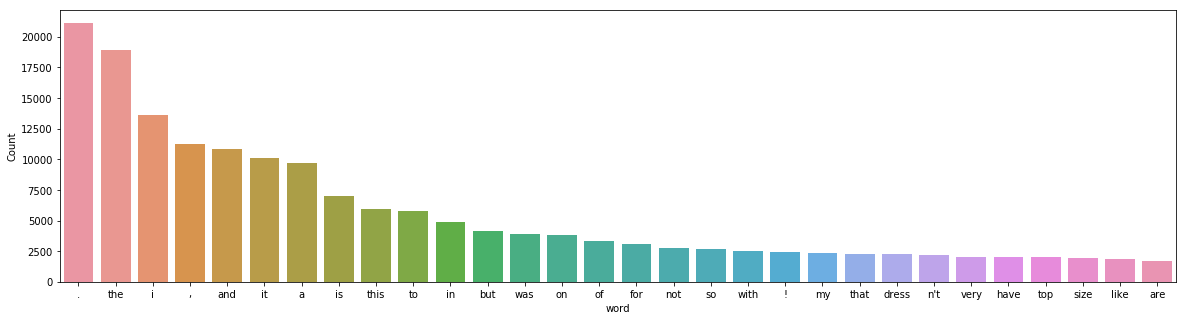

In [29]:
freq_words(df2['Review Text'])
#df3 = pd.DataFrame(freq_words(df2['Review Text'],4823))
#df3.to_csv("words3.csv")

In [30]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df2['Review Text'] = df2['Review Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df2['Review Text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [34]:
print(reviews)

['top stunning colors vivid extremely cozy soft however seems delicate would need worn everyday top material cotton candy like appearance really unique one kind', 'even following care label exactly shrunk inches length overall diameter return since tall looked like work-inappropriate mini first wash', 'excited receive top looked great online vibrant colors beautiful detail sleeves tried fabric looked felt cheap flowy top recommend', "nice weight sweater allows one wear leggings ultra skinny jeans without looking like i'm pregnant there's anything wrong feminine light weight enough wear cami underneath pretty scarf", 'perfect trans top skinnies boyfriend booties love mixed prints', 'pretty pink top great layering iand alone summer spring', "n't like itchy fabric looked good model busty girl", "love dress mean really pretty person however breast area small n't wear bra older'' breasts droop flattering barely covered bit disappointed smaller say give try 115 lbs 26.5 ion waist 30dd petite

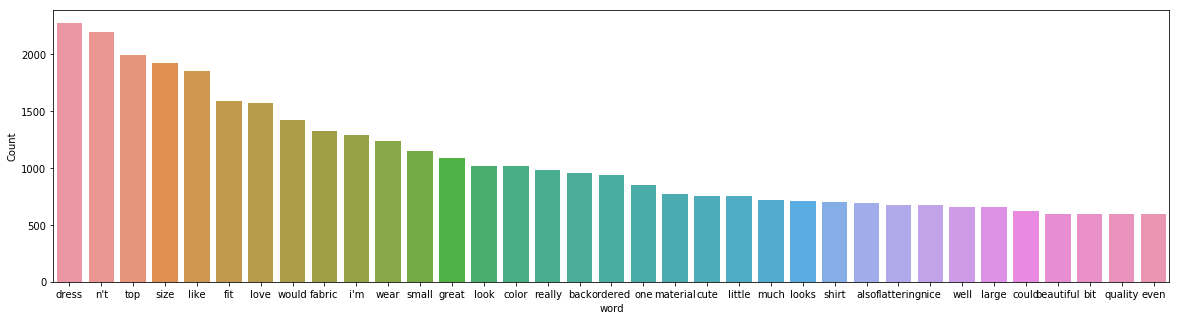

In [35]:
freq_words(reviews, 35)

In [36]:
import spacy

In [37]:
nlp = spacy.load('en', disable=['parser', 'ner'])



In [38]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    # filter noun and adjective
    output = []
    for sent in texts:
        
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [40]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
#print(tokenized_reviews)

0                       [top, stunning, colors, vivid, extremely, cozy, soft, however, seems, delicate, would, need, worn, everyday, top, material, cotton, candy, like, appearance, really, unique, one, kind]
1                                                  [even, following, care, label, exactly, shrunk, inches, length, overall, diameter, return, since, tall, looked, like, work-inappropriate, mini, first, wash]
2                                                        [excited, receive, top, looked, great, online, vibrant, colors, beautiful, detail, sleeves, tried, fabric, looked, felt, cheap, flowy, top, recommend]
3       [nice, weight, sweater, allows, one, wear, leggings, ultra, skinny, jeans, without, looking, like, i'm, pregnant, there's, anything, wrong, feminine, light, weight, enough, wear, cami, underneath,...
4                                                                                                                                      [perfect, trans, top, skinnies, b

Length: 5204, dtype: object


In [92]:
reviews_2 = lemmatization(tokenized_reviews)
#print(reviews_2) # print lemmatized review


In [42]:
import csv
import pandas as pd

In [ ]:
#with open('words.csv', 'w', encoding="utf-8") as f:
 #   writer = csv.writer(f)
  #  writer.writerows(reviews_2)

#f.close()

In [ ]:
#reviews_3 = []
#for i in range(len(reviews_2)):
#    reviews_3.append(' '.join(reviews_2[i]))

#df2['reviews'] = reviews_3

#freq_words(df2['reviews'],4823)

In [ ]:
#df3 = pd.DataFrame(freq_words(df2['reviews'],4823))


In [ ]:
#print(df3)

In [147]:
Fit = pd.read_csv(r'C:\Users\abhim\Desktop\INST741\Fit.csv')

In [148]:
Color=pd.read_csv(r'C:\Users\abhim\Desktop\INST741\Color.csv')

In [149]:
Quality=pd.read_csv(r'C:\Users\abhim\Desktop\INST741\Quality.csv')

In [150]:
Cost=pd.read_csv(r'C:\Users\abhim\Desktop\INST741\Cost.csv')

In [151]:
Fit_list=Fit.values.tolist()
Color_list=Color.values.tolist()
Quality_list=Quality.values.tolist()
Cost_list=Cost.values.tolist()

In [207]:
#reviews_2[2]
#Fit_list
#Fit
#a
set(reviews_2[1]).intersection(set(a))

{'inappropriate', 'inch', 'tall'}

In [154]:
a=sum(Fit_list, [])
b=sum(Color_list, [])
c=sum(Quality_list, [])
d=sum(Cost_list, [])

In [161]:
list1=[]
for x in range(len(reviews_2)):
    Fit_match_length=len(set(reviews_2[x]).intersection(set(a)))
    Color_match_length=len(set(reviews_2[x]).intersection(set(b)))
    Quality_match_length=len(set(reviews_2[x]).intersection(set(c)))
    Cost_match_length=len(set(reviews_2[x]).intersection(set(d)))
    
    if Fit_match_length > Color_match_length and Fit_match_length > Quality_match_length and Fit_match_length > Cost_match_length:
        list1.append('FIT')
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on FIT ")
        
    elif Color_match_length > Fit_match_length and Color_match_length > Quality_match_length and Color_match_length > Cost_match_length:
        list1.append('COLOR')
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COLOR ")
    
    elif Quality_match_length > Fit_match_length and Color_match_length < Quality_match_length and Quality_match_length > Cost_match_length:
        list1.append('QUALITY')
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on QUALITY ")
    
    elif Cost_match_length > Fit_match_length and Cost_match_length > Quality_match_length and Color_match_length < Cost_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('COST')
    
    elif Cost_match_length== Fit_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('COST,FiT')
        
    elif Cost_match_length == Color_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('COST,COLOR')
    
    elif Cost_match_length == Quality_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('COST,QUALITY')
    
    elif Fit_match_length== Color_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('COLOR,FIT')
        
    elif Fit_match_length== Quality_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('QUALITY,FIT')
    
    elif Color_match_length== Quality_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('QUALITY,COLOR')
        
    elif Fit_match_length== Quality_match_length and Fit_match_length== Color_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('QUALITY,FIT,COLOR')
    
    elif Fit_match_length== Quality_match_length and Fit_match_length== Cost_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('QUALITY,FIT,COST')
    elif Fit_match_length== Color_match_length and Fit_match_length== Cost_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('COLOR,FIT,COST')
        
    elif Quality_match_length==Color_match_length and Quality_match_length== Cost_match_length:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('QUALITY,COST,COLOR')
    
    else:
        #reviews_2[x].insert(len(reviews_2[x]),"This review is focused on COST ")
        list1.append('QUALITY,FIT,COST,Color')
    

In [162]:
#print(reviews_2)
len(list1)

5204

In [140]:
lst = df2['Review Text']

In [141]:
lst

0       this top stunning the colors are vivid and extremely cozy and soft however seems delicate and would need only worn once while not everyday top the material has cotton candy like appearance really ...
1                          even following the care label exactly shrunk inches the length and overall the diameter had return this since tall and looked more like work-inappropriate mini after the first wash
2                                 was excited receive this top looked great online vibrant colors with the beautiful detail the sleeves when tried the fabric looked and felt cheap not flowy top not recommend
3       nice weight sweater that allows one wear leggings ultra skinny jeans without looking like i'm pregnant not that there's anything wrong with that very feminine and light weight enough wear with cam...
4                                                                                                                                        perfect trans top skinnies boyf

In [163]:
df = pd.DataFrame(data=df2['Review Text'])

In [164]:
df['Focussed attribute of review']=list1
df['Sentiment']=df2['Sentiment']

In [165]:
df.head()

,Review Text,Focussed attribute of review,Sentiment
0,this top stunning the colors are vivid and extremely cozy and soft however seems delicate and would need only worn once while not everyday top the material has cotton candy like appearance really ...,QUALITY,0
1,even following the care label exactly shrunk inches the length and overall the diameter had return this since tall and looked more like work-inappropriate mini after the first wash,FIT,-1
2,was excited receive this top looked great online vibrant colors with the beautiful detail the sleeves when tried the fabric looked and felt cheap not flowy top not recommend,QUALITY,-1
3,nice weight sweater that allows one wear leggings ultra skinny jeans without looking like i'm pregnant not that there's anything wrong with that very feminine and light weight enough wear with cam...,QUALITY,1
4,perfect trans top skinnies boyfriend and booties love the mixed prints,QUALITY,1


In [166]:
df.to_csv(r'C:\Users\abhim\Desktop\INST741\Output2.csv')

In [417]:
df1["attribute"]=df['Focussed attribute of review']

In [431]:
df1["Fit"]=df1["Fit"].replace(-1, 1)
df1["Color"]=df1["Color"].replace(-1, 1)
df1["Cost"]=df1["Cost"].replace(-1, 1)
df1["Quality"]=df1["Quality"].replace(-1, 1)

In [434]:
df1=df1.drop(['Fabric', 'Style'],axis=1)

In [435]:
df1

,Review Text,Sentiment,Fit,Color,Cost,Quality,attribute
0,This top is stunning. the colors are vivid and it is extremely cozy and soft. however it seems delicate and would need to only be worn once in a while. it is not an everyday top. the material has ...,0,NaN,1.0,NaN,1,QUALITY
1,"Even following the care label exactly, it shrunk ~3 inches in the length and overall in the diameter. i had to return this since i am tall and it looked more like a work-inappropriate mini after t...",-1,1.0,NaN,NaN,1,FIT
2,"I was excited to receive this top. it looked great online, vibrant colors with the beautiful detail on the sleeves. when i tried it on, the fabric looked and felt cheap. it is not a flowy top. do ...",-1,NaN,1.0,NaN,1,QUALITY
3,Nice weight sweater that allows one to wear leggings or ultra skinny jeans without looking like i'm pregnant (not that there's anything wrong with that) very feminine and light weight enough to we...,1,NaN,NaN,NaN,1,QUALITY
4,Perfect trans top. skinnies or boyfriend and booties. love the mixed prints,1,NaN,NaN,NaN,1,QUALITY
5,Pretty pink top is great for layering iand alone in the summer and spring,1,NaN,1.0,NaN,1,COLOR
6,"Didn't like at all. itchy fabric, looked good on model but not on busty girl.",-1,NaN,NaN,NaN,1,QUALITY
7,"I love this dress, i mean it is really pretty in person, however, the breast area is just too small... i can't wear a bra with it, and my ""older"" breasts just droop, not flattering. they are barel...",0,1.0,1.0,NaN,1,QUALITY
8,"I loved this skirt on but just the other reviewers, it runs small in the waist throwing off the dimension of the skirt. i ended up getting the 0 despite the fact that it was tighter in the waist b...",-1,1.0,NaN,NaN,0,FIT
9,I like this sleeveless sweater - it adds warmth and visual interest without adding a lot of bulk. paired with black/white patterns it's pretty versatile (as seen in the pics) - a great staple for ...,1,1.0,NaN,NaN,1,FIT


In [436]:
df1.to_csv(r'C:\Users\abhim\Desktop\INST741\finout.csv')

In [481]:
datf=pd.read_csv(r'C:\Users\abhim\Desktop\INST741\finout.csv')
#datf2=pd.read_csv(r'C:\Users\abhim\Desktop\INST741\outputsdf.csv')

In [482]:
len(datf['Review Text'])

5204

In [483]:
datf

,Unnamed: 0,Review Text,Sentiment,Fit,Color,Cost,Quality,attribute
0,0,This top is stunning. the colors are vivid and it is extremely cozy and soft. however it seems delicate and would need to only be worn once in a while. it is not an everyday top. the material has ...,0,NaN,1.0,NaN,1,QUALITY
1,1,"Even following the care label exactly, it shrunk ~3 inches in the length and overall in the diameter. i had to return this since i am tall and it looked more like a work-inappropriate mini after t...",-1,1.0,NaN,NaN,1,FIT
2,2,"I was excited to receive this top. it looked great online, vibrant colors with the beautiful detail on the sleeves. when i tried it on, the fabric looked and felt cheap. it is not a flowy top. do ...",-1,NaN,1.0,NaN,1,QUALITY
3,3,Nice weight sweater that allows one to wear leggings or ultra skinny jeans without looking like i'm pregnant (not that there's anything wrong with that) very feminine and light weight enough to we...,1,NaN,NaN,NaN,1,QUALITY
4,4,Perfect trans top. skinnies or boyfriend and booties. love the mixed prints,1,NaN,NaN,NaN,1,QUALITY
5,5,Pretty pink top is great for layering iand alone in the summer and spring,1,NaN,1.0,NaN,1,COLOR
6,6,"Didn't like at all. itchy fabric, looked good on model but not on busty girl.",-1,NaN,NaN,NaN,1,QUALITY
7,7,"I love this dress, i mean it is really pretty in person, however, the breast area is just too small... i can't wear a bra with it, and my ""older"" breasts just droop, not flattering. they are barel...",0,1.0,1.0,NaN,1,QUALITY
8,8,"I loved this skirt on but just the other reviewers, it runs small in the waist throwing off the dimension of the skirt. i ended up getting the 0 despite the fact that it was tighter in the waist b...",-1,1.0,NaN,NaN,0,FIT
9,9,I like this sleeveless sweater - it adds warmth and visual interest without adding a lot of bulk. paired with black/white patterns it's pretty versatile (as seen in the pics) - a great staple for ...,1,1.0,NaN,NaN,1,FIT


In [476]:
if Color[0]==1 and Quality[0]==1:
    print("abhimanyu")

abhimanyu


In [484]:
Fit=datf['Fit']
Color=datf['Color']
Quality=datf['Quality']
Cost=datf['Cost']
list2=[]
#list3=[]
for x in range(len(datf['Review Text'])): 
    if Cost[x]==1 and Fit[x]==1 and Color[x]==1:
        list2.append('COST,FIT,COLOR')
    
    elif Cost[x]==1 and Fit[x]==1 and Quality[x]==1:
        list2.append('COST,FIT,QUALITY')
        
    elif Cost[x]==1 and Quality[x]==1 and Color[x]==1:
        list2.append('COST,QUALITY,COLOR')
        
    elif Quality[x]==1 and Fit[x]==1 and Color[x]==1:
        list2.append('QUALITY,FIT,COLOR')
    elif Color[x]==1 and Fit[x]==1:
        list2.append('COLOR,FIT')
        
    elif Cost[x]==1 and Fit[x]==1:
        list2.append('COST,FIT')
        
    elif Quality[x]==1 and Fit[x]==1:
        list2.append('QUALITY,FIT')
        
    elif Color[x]==1 and Cost[x]==1:
        list2.append('COLOR,COST')
        
    elif Color[x]==1 and Quality[x]==1:
        #print("abhimanyu")
        list2.append('COLOR,QUALITY')
    
    elif Quality[x]==1 and Cost[x]==1:
        
        list2.append('QUALITY,COST')
    elif Fit[x]==1:
        list2.append('FIT')
    elif Quality[x]==1:
        list2.append('QUALITY')
    elif Cost[x]==1:
        list2.append('COST')
    elif Color[x]==1:
        list2.append('COLOR')      

        
    else:
        list2.append('COST,FIT,COLOR,QUALITY')
    
        
        
    

In [485]:
list2

['COLOR,QUALITY',
 'QUALITY,FIT',
 'COLOR,QUALITY',
 'QUALITY',
 'QUALITY',
 'COLOR,QUALITY',
 'QUALITY',
 'QUALITY,FIT,COLOR',
 'FIT',
 'QUALITY,FIT',
 'QUALITY',
 'QUALITY,FIT',
 'QUALITY,FIT',
 'QUALITY',
 'QUALITY',
 'FIT',
 'QUALITY,FIT',
 'COST,QUALITY,COLOR',
 'FIT',
 'COLOR,FIT',
 'QUALITY',
 'FIT',
 'QUALITY,FIT',
 'QUALITY,FIT,COLOR',
 'QUALITY',
 'QUALITY',
 'FIT',
 'QUALITY',
 'QUALITY,FIT',
 'QUALITY,FIT',
 'FIT',
 'QUALITY,FIT',
 'QUALITY',
 'QUALITY',
 'QUALITY,FIT',
 'QUALITY,FIT',
 'QUALITY',
 'COLOR,QUALITY',
 'QUALITY,FIT,COLOR',
 'QUALITY',
 'QUALITY,FIT',
 'QUALITY,FIT',
 'QUALITY',
 'QUALITY',
 'COLOR,FIT',
 'QUALITY',
 'QUALITY',
 'QUALITY,FIT',
 'QUALITY,FIT,COLOR',
 'FIT',
 'QUALITY,FIT',
 'QUALITY,FIT,COLOR',
 'QUALITY,FIT',
 'COST,FIT,COLOR',
 'QUALITY,FIT,COLOR',
 'QUALITY,FIT',
 'QUALITY',
 'QUALITY,FIT',
 'QUALITY',
 'QUALITY,FIT',
 'QUALITY,FIT',
 'QUALITY',
 'QUALITY',
 'QUALITY,FIT',
 'QUALITY',
 'COLOR,QUALITY',
 'COLOR,FIT',
 'QUALITY,COST',
 'QUALITY

In [486]:
datf['man attr']=list2

In [487]:
#list3
datf.head()

,Unnamed: 0,Review Text,Sentiment,Fit,Color,Cost,Quality,attribute,man attr
0,0,This top is stunning. the colors are vivid and it is extremely cozy and soft. however it seems delicate and would need to only be worn once in a while. it is not an everyday top. the material has ...,0,NaN,1.0,NaN,1,QUALITY,"COLOR,QUALITY"
1,1,"Even following the care label exactly, it shrunk ~3 inches in the length and overall in the diameter. i had to return this since i am tall and it looked more like a work-inappropriate mini after t...",-1,1.0,NaN,NaN,1,FIT,"QUALITY,FIT"
2,2,"I was excited to receive this top. it looked great online, vibrant colors with the beautiful detail on the sleeves. when i tried it on, the fabric looked and felt cheap. it is not a flowy top. do ...",-1,NaN,1.0,NaN,1,QUALITY,"COLOR,QUALITY"
3,3,Nice weight sweater that allows one to wear leggings or ultra skinny jeans without looking like i'm pregnant (not that there's anything wrong with that) very feminine and light weight enough to we...,1,NaN,NaN,NaN,1,QUALITY,QUALITY
4,4,Perfect trans top. skinnies or boyfriend and booties. love the mixed prints,1,NaN,NaN,NaN,1,QUALITY,QUALITY


In [452]:
#datf['man attr']=datf['man attr'].replace("[","" )

In [488]:
manattr=datf['man attr']

In [489]:
import re
#datf['man attr']=datf['man attr'].dropna(axis=0)

In [454]:
manattr[0]

['QUALITY', 'COLOR']

In [394]:
datf.to_csv(r'C:\Users\abhim\Desktop\INST741\newotp.csv')


In [404]:
datf2=pd.read_csv(r'C:\Users\abhim\Desktop\INST741\newotp.csv')


In [490]:
attr=datf['attribute'].str.strip()
manattr=datf['man attr'].str.strip()

In [492]:
manattr[0]

'COLOR,QUALITY'

In [493]:
import numpy as np 
count=0
for x in range(len(datf['Review Text'])):
    a=attr[x]
    b=manattr[x]
    #print(x)
    if re.match(a,b):
        count=count+1
        
        
        
    

In [494]:
accuracy=(count/len(datf2['Review Text']))*100

In [495]:
accuracy

42.02536510376633